In [1]:
library("phangorn")
library("ggplot2")
library("reshape2")
library("geiger")
library("adephylo")
library("phytools")
library("rlist")
library("plotrix")
library("plyr")
library("dplyr")
library("hrbrthemes")
library("rstatix")
library("gplots")
library("viridis")
library('gtools')
library(gridExtra)
library(grid)
library("ggforce")
library("scales")
#library("TreeTools",lib.loc = '/nfs/users/cn/abaltzis/R/x86_64-pc-linux-gnu-library/4.1')
#library("Cairo",lib.loc = '/nfs/users/cn/abaltzis/R/x86_64-pc-linux-gnu-library/4.1')


Loading required package: ape

Loading required package: ade4

Loading required package: maps


Attaching package: ‘phytools’


The following object is masked from ‘package:ape’:

    drop.tip.multiPhylo



Attaching package: ‘plotrix’


The following object is masked from ‘package:geiger’:

    rescale



Attaching package: ‘plyr’


The following object is masked from ‘package:maps’:

    ozone



Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow




In [2]:
#
# Supermatrix and Supertree trees VS true topologies
#

RF_avg_list = list()
TBE_avg_list = list()
RF_se_list = list()
TBE_se_list = list()
RF_avg_norm_list = list()
TBE_avg_norm_list = list()
collect_branch_len_supermatrix_ml = c()
collect_diameter_supermatrix_ml = c()

run_dirs = grep("rerun_sim_b_factor*",list.dirs(path = ".",recursive = FALSE),value = TRUE)
for (run in run_dirs) {
    print(basename(run))
    setwd(run)

    ref_codefile = read.table(file = "../../ref_tree.code")
    fam_dirs = grep("avg_branchlen*",list.dirs(path = ".",recursive = FALSE),value = TRUE)
    count_fam = 0

    avg_branch_length = c()
    orgs<-read.table(file = "../../orthologs_org_ids_to_concatenate")

    for (m in fam_dirs) {
        count_fam=count_fam+1
        curr_dir = paste(m,"/results/rerun",sep = "")
        print(basename(m))
        setwd(curr_dir)
        all_units_trees <- read.tree("all_units.nwk",keep.multi=TRUE)
        all_units_trees = unroot(all_units_trees)
        if (length(which(is.binary(all_units_trees) == FALSE)) != 0) {
            for (tree in which(is.binary(all_units_trees) == FALSE)) {
                all_units_trees[[tree]] = multi2di(all_units_trees[[tree]])
            }
        }
        all_superfine_trees <- read.tree("all_units_superfine_trees.nwk",keep.multi=TRUE)
        all_superfine_trees = unroot(all_superfine_trees)
        if (length(which(is.binary(all_superfine_trees) == FALSE)) != 0) {
            for (tree in which(is.binary(all_superfine_trees) == FALSE)) {
                all_superfine_trees[[tree]] = multi2di(all_superfine_trees[[tree]])
            }
        }
        if (FALSE){
        all_MRL_trees <- read.tree("all_units_MRL_trees.nwk",keep.multi=TRUE)
        all_MRL_trees = unroot(all_MRL_trees)
        if (length(which(is.binary(all_MRL_trees) == FALSE)) != 0) {
            for (tree in which(is.binary(all_MRL_trees) == FALSE)) {
                all_MRL_trees[[tree]] = multi2di(all_MRL_trees[[tree]])
            }
        }
        }

        all_units_raxml_trees <- read.tree("all_units_RAxML_trees.nwk",keep.multi=TRUE)
        all_units_raxml_trees = unroot(all_units_raxml_trees)
        if (length(which(is.binary(all_units_raxml_trees) == FALSE)) != 0) {
            for (tree in which(is.binary(all_units_raxml_trees) == FALSE)) {
                all_units_raxml_trees[[tree]] = multi2di(all_units_raxml_trees[[tree]])
            }
        }
        for(mytree in 241:length(all_units_raxml_trees)) {
        collect_branch_len_supermatrix_ml = c(collect_branch_len_supermatrix_ml,all_units_raxml_trees[[mytree]]$edge.length)
        collect_diameter_supermatrix_ml = c(collect_diameter_supermatrix_ml,max(distTips(all_units_raxml_trees[[mytree]],method = 'patristic')))
        }
        
        all_raxml_superfine_trees <- read.tree("all_units_RAxML_superfine_trees.nwk",keep.multi=TRUE)
        all_raxml_superfine_trees = unroot(all_raxml_superfine_trees)
        if (length(which(is.binary(all_raxml_superfine_trees) == FALSE)) != 0) {
            for (tree in which(is.binary(all_raxml_superfine_trees) == FALSE)) {
                all_raxml_superfine_trees[[tree]] = multi2di(all_raxml_superfine_trees[[tree]])
            }
        }
        
        if (FALSE) {
        all_raxml_MRL_trees <- read.tree("all_units_RAxML_MRL_trees.nwk",keep.multi=TRUE)
        all_raxml_MRL_trees = unroot(all_raxml_MRL_trees)
        if (length(which(is.binary(all_raxml_MRL_trees) == FALSE)) != 0) {
            for (tree in which(is.binary(all_raxml_MRL_trees) == FALSE)) {
                all_raxml_MRL_trees[[tree]] = multi2di(all_raxml_MRL_trees[[tree]])
            }
        }
        }

    ref_tree <- read.tree(file=paste("../../../",basename(m),".nwk",sep=""),keep.multi=FALSE)
    #for (j in 1:length(ref_tree$tip.label)) { ref_tree$tip.label[j] = as.character(ref_codefile$V2[which(ref_codefile$V1 == ref_tree[["tip.label"]][j])])}
    ref_subtree=keep.tip(ref_tree,as.character(ref_codefile$V1))
    for (j in 1:length(ref_subtree$tip.label)) { ref_subtree$tip.label[j] = as.character(ref_codefile$V2[which(ref_codefile$V1 == ref_subtree[["tip.label"]][j])])}
    ref_subtree = unroot(ref_subtree)
    ref_subtree=list(ref_subtree)
    class(ref_subtree)="multiPhylo"
    subtree_out = paste("ref_subtree_",basename(m),".nwk",sep="")
    write.tree(ref_subtree,file=subtree_out)
    #for(x in 1:length(all_units_trees)) { for (j in 1:length(all_units_trees[[x]]$tip.label)) { all_units_trees[[x]]$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == all_units_trees[[x]][["tip.label"]][j])])}}
    avg_branch_length = c(avg_branch_length,mean(ref_subtree[[1]]$edge.length))

    #mrl_supertree <- read.tree(file="PFCL0016/results/superfine_MRL_supertree.nwk",keep.multi=FALSE)
    #for (j in 1:length(mrl_supertree$tip.label)) { mrl_supertree$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == mrl_supertree[["tip.label"]][j])])}
    #mrl_supertree=list(mrl_supertree)
    #class(mrl_supertree)<-"multiPhylo"
    if (FALSE){
        supertree_input <- read.tree(file = "all_supertrees.nwk", keep.multi = TRUE)
        mrp=compute.mr(supertree_input,type=c("matrix"))
        write.dna(mrp,file="mrp.phy",format="interleaved")
        system("raxmlHPC -m BINGAMMA -p 23224 -s mrp.phy -n mrl")
        mrl_raxml <- read.tree(file="RAxML_bestTree.mrl",keep.multi=FALSE)
        #for (j in 1:length(mrl_raxml$tip.label)) { mrl_raxml$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == mrl_raxml[["tip.label"]][j])])}
        mrl_raxml=list(mrl_raxml)
        class(mrl_raxml)<-"multiPhylo" 
        mrl_supertree_decoded = "MRL_supertree_decoded.nwk"
        write.tree(mrl_raxml,file=mrl_supertree_decoded)
        output_booster_mrl_tree = "MRL_supertree_decoded_booster.nwk"

        mrp_supertree <- read.tree(file="superfine_MRP_supertree.nwk",keep.multi=FALSE)
        #for (j in 1:length(mrp_supertree$tip.label)) { mrp_supertree$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == mrp_supertree[["tip.label"]][j])])}
        mrp_supertree=list(mrp_supertree)
        class(mrp_supertree)<-"multiPhylo"
        mrp_supertree_decoded = "superfine_MRP_supertree_decoded.nwk"
        write.tree(mrp_supertree,file=mrp_supertree_decoded)
        output_booster_mrp_tree = "MRP_supertree_decoded_booster.nwk"

        system(paste("booster -i",mrl_supertree_decoded,"-b",subtree_out,"-o",output_booster_mrl_tree,"-q",sep = " "))
        booster_mrl_tree = read.tree(file = output_booster_mrl_tree)
        val_tbe_mrl = round(mean(as.numeric(booster_mrl_tree$node.label[-1])), digits = 3)

        system(paste("booster -i",mrp_supertree_decoded,"-b",subtree_out,"-o",output_booster_mrp_tree,"-q",sep = " "))
        booster_mrp_tree = read.tree(file = output_booster_mrp_tree)
        val_tbe_mrp = round(mean(as.numeric(booster_mrp_tree$node.label[-1])), digits = 3)

        units_TBE_mean = c()
        units_TBE_SE = c()
        units_TBE_mean_norm = c()
        for (k in 1:length(orgs$V1)) {
            TBE_mean = c()
            for (i in 1:10) {
                input = paste("unit_",k,"_sample_",i,"_concatenated_aln.phylip_fastme_tree.nwk",sep = "")
                all_trees <- read.tree(file = input, keep.multi = FALSE)
                #for (j in 1:length(all_trees$tip.label)) { all_trees$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_trees[["tip.label"]][j])])}
                output_booster_tree = paste("unit_",k,"_sample_",i,"_booster_from_ref.nwk",sep = "")
                system(paste("booster -i",input,"-b",subtree_out,"-o",output_booster_tree,"-q",sep = " "))
                booster_tree = read.tree(file = output_booster_tree)
                val_tbe = mean(as.numeric(booster_tree$node.label[-1]))
                TBE_mean <- c(TBE_mean,val_tbe)
            }
            units_TBE_mean = c(units_TBE_mean,round(mean(TBE_mean),digits = 3))
            units_TBE_SE = c(units_TBE_SE,round(sd(TBE_mean)/sqrt(10),digits = 3))
        }

        units_TBE_mean = c(units_TBE_mean,val_tbe_mrl,val_tbe_mrp)
        units_TBE_SE = c(units_TBE_SE,NA,NA)

        units_TBE_mean_norm = round(units_TBE_mean/max(units_TBE_mean),digits=3)
    }
   
    all_trees = c(ref_subtree,all_units_trees,all_superfine_trees,all_units_raxml_trees,all_raxml_superfine_trees)
    class(all_trees)="multiPhylo"

    all_vs_all_rf=RF.dist(all_trees,normalize=TRUE)
    plotdata =data.matrix(all_vs_all_rf)

    mean_rf=c()
    se_rf=c()
    mean_rf_norm=c()
    #mean_mrl_rf = c()
    #se_mrl_rf = c()
    mean_superfine_rf = c()
    se_superfine_rf = c()

    mean_raxml_rf=c()
    se_raxml_rf=c()
    mean_raxml_rf_norm=c()
    #mean_raxml_mrl_rf = c()
    #se_raxml_mrl_rf = c()
    mean_raxml_superfine_rf = c()
    se_raxml_superfine_rf = c()

    for (i in seq(2,(length(orgs$V1)*10)+1,by=10)) {
        mean_rf=c(mean_rf,mean(plotdata[1,i:(i+9)]))
        se_rf=c(se_rf,(sd(plotdata[1,i:(i+9)])/sqrt(10)))
    }

    for (i in seq( ((length(orgs$V1)*10))+2,(2*(length(orgs$V1)*10)+1),by=10)) {
        mean_superfine_rf=c(mean_superfine_rf,mean(plotdata[1,i:(i+9)]))
        se_superfine_rf=c(se_superfine_rf,(sd(plotdata[1,i:(i+9)])/sqrt(10)))
    }

    for (i in seq( (2*(length(orgs$V1)*10))+2,(3*(length(orgs$V1)*10)+1),by=10)) {
        mean_raxml_rf=c(mean_raxml_rf,mean(plotdata[1,i:(i+9)]))
        se_raxml_rf=c(se_raxml_rf,(sd(plotdata[1,i:(i+9)])/sqrt(10)))
    }

    for (i in seq( (3*(length(orgs$V1)*10))+2,(4*(length(orgs$V1)*10)+1),by=10)) {
        mean_raxml_superfine_rf=c(mean_raxml_superfine_rf,mean(plotdata[1,i:(i+9)]))
        se_raxml_superfine_rf=c(se_raxml_superfine_rf,(sd(plotdata[1,i:(i+9)])/sqrt(10)))
    }

    mean_rf=c(mean_rf,mean_superfine_rf,mean_raxml_rf,mean_raxml_superfine_rf)
    se_rf=c(se_rf,se_superfine_rf,se_raxml_rf,se_raxml_superfine_rf)

    mean_rf_norm = round(mean_rf/min(mean_rf),digits=3)

    units_names = c()
    for (i in 1:length(orgs$V1)) {units_names=c(units_names,paste("unit_",i,sep=""))}

    units_names=c(units_names,paste0("MRP_",units_names),paste0("raxml_",units_names),paste0("raxml_MRP_",units_names))

    #mydf=data.frame(units_names,mean_rf,se_rf,units_TBE_mean,units_TBE_SE)
    #write.table(mydf,file="../avg_RF_and_TBE_between_ref_supermatrix_and_supertree.tsv",quote=FALSE,row.names = FALSE)
    #s<-ggplot(mydf,aes(x=units_names,group=1))+scale_x_discrete(limits=mydf$units_names)+geom_errorbar(aes(ymin=mean_rf-2*se_rf,ymax=mean_rf+2*se_rf),width=0.2,position=position_dodge(0.05))+geom_line(aes(y=mean_rf,col="RF"))+geom_errorbar(aes(ymin=units_TBE_mean-2*units_TBE_SE,ymax=units_TBE_mean+2*units_TBE_SE),width=0.2,position=position_dodge(0.05))+geom_line(aes(y=units_TBE_mean,col="TBE"))+ylab("normalized RF between ref and TBE sim ref tree and topologies")+xlab("Topology")+scale_color_manual("",values =c("TBE"="green","RF"="blue"))+theme(axis.text.x=element_text(angle = 45, hjust = 1))
    #ggsave("../RF_and_TBE_sim_ref_tree_vs_supermatrix_and_supertree.png")

    setwd("../../../")

    #
    # Average lists
    #
    
    RF_avg_list = list.append(RF_avg_list,mean_rf)
    #TBE_avg_list = list.append(TBE_avg_list,units_TBE_mean)
    RF_se_list = list.append(RF_se_list,se_rf)
    #TBE_se_list = list.append(TBE_se_list,units_TBE_SE)

    RF_avg_norm_list = list.append(RF_avg_norm_list,mean_rf_norm)
    #TBE_avg_norm_list = list.append(TBE_avg_norm_list,units_TBE_mean_norm)
    }
    
    setwd("../")
    }


    overall_RF_mean = c()
    overall_RF_se = c()
    #overall_TBE_mean = c()
    #overall_TBE_se = c()

    overall_RF_mean_norm = c()
    overall_RF_se_norm = c()
    #overall_TBE_mean_norm = c()
    #overall_TBE_se_norm = c()

    if (count_fam > 1) {
        overall_RF_mean = round(colMeans(ldply(RF_avg_list,recursive=FALSE)),digits=3)
        overall_RF_se = round(apply(ldply(RF_avg_list,recursive=FALSE),2,std.error),digits=3)
        #overall_TBE_mean = round(colMeans(ldply(TBE_avg_list,recursive=FALSE)),digits=3)
        #overall_TBE_se = round(apply(ldply(TBE_avg_list,recursive=FALSE),2,std.error),digits=3)

        overall_RF_mean_norm = round(colMeans(ldply(RF_avg_norm_list,recursive=FALSE)),digits=3)
        overall_RF_se_norm = round(apply(ldply(RF_avg_norm_list,recursive=FALSE),2,std.error),digits=3)
        #overall_TBE_mean_norm = round(colMeans(ldply(TBE_avg_norm_list,recursive=FALSE)),digits=3)
        #overall_TBE_se_norm = round(apply(ldply(TBE_avg_norm_list,recursive=FALSE),2,std.error),digits=3)

        RF_df = cbind(round(ldply(RF_avg_list,recursive=FALSE),digits=3),round(ldply(RF_se_list,recursive=FALSE),digits=3))
        #TBE_df = cbind(round(ldply(TBE_avg_list,recursive=FALSE),digits=3),round(ldply(TBE_se_list,recursive=FALSE),digits=3))	
        
        RF_df_norm = round(ldply(RF_avg_norm_list,recursive=FALSE),digits=3)
        #TBE_df_norm = round(ldply(TBE_avg_norm_list,recursive=FALSE),digits=3)
    } else {
        overall_RF_mean = round(unlist(RF_avg_list,recursive=FALSE),digits=3)
        overall_RF_se = round(apply(as.data.frame(t(as.data.frame(unlist(RF_avg_list,recursive=FALSE)))),2,std.error),digits=3)
        #overall_TBE_mean = round(unlist(TBE_avg_list,recursive=FALSE),digits=3)
        #overall_TBE_se = round(apply(as.data.frame(t(as.data.frame(unlist(TBE_avg_list,recursive=FALSE)))),2,std.error),digits=3)

        overall_RF_mean_norm = round(unlist(RF_avg_norm_list,recursive=FALSE),digits=3)
        overall_RF_se_norm = round(apply(as.data.frame(t(as.data.frame(unlist(RF_avg_norm_list,recursive=FALSE)))),2,std.error),digits=3)
        #overall_TBE_mean_norm = round(unlist(TBE_avg_norm_list,recursive=FALSE),digits=3)
        #overall_TBE_se_norm = round(apply(as.data.frame(t(as.data.frame(unlist(TBE_avg_norm_list,recursive=FALSE)))),2,std.error),digits=3)

        RF_df = as.data.frame(t(as.data.frame(c(round(unlist(RF_avg_list,recursive=FALSE),digits=3),round(unlist(RF_se_list,recursive=FALSE),digits=3)))))
        #TBE_df = as.data.frame(t(as.data.frame(c(round(unlist(TBE_avg_list,recursive=FALSE),digits=3),round(unlist(TBE_se_list,recursive=FALSE),digits=3)))))

        RF_df_norm = as.data.frame(t(as.data.frame(round(unlist(RF_avg_norm_list,recursive=FALSE),digits=3))))
        #TBE_df_norm = as.data.frame(t(as.data.frame(round(unlist(TBE_avg_norm_list,recursive=FALSE),digits=3))))
    }

    colnames(RF_df) = c(units_names,sapply(units_names,paste0, "_se"))
    #colnames(TBE_df) = c(units_names,sapply(units_names,paste0, "_se"))

    colnames(RF_df_norm) = units_names
    #colnames(TBE_df_norm) = units_names

    write.table(RF_df,file = "avg_RF_between_ref_supermatrix_and_supertree.tsv",quote=FALSE,row.names = FALSE)
    #write.table(TBE_df,file = "avg_TBE_between_ref_supermatrix_and_supertree.tsv",quote=FALSE,row.names = FALSE)


[1] "rerun_sim_b_factor_3.5_avg_branchlen_0.7_from_11th_17th_20th_22th_and_23th_50_fams_25_species"
[1] "avg_branchlen_0.7_protein_family_001.sub"
[1] "avg_branchlen_0.7_protein_family_002.sub"
[1] "avg_branchlen_0.7_protein_family_003.sub"
[1] "avg_branchlen_0.7_protein_family_004.sub"
[1] "avg_branchlen_0.7_protein_family_005.sub"
[1] "avg_branchlen_0.7_protein_family_006.sub"
[1] "avg_branchlen_0.7_protein_family_007.sub"
[1] "avg_branchlen_0.7_protein_family_008.sub"
[1] "avg_branchlen_0.7_protein_family_009.sub"
[1] "avg_branchlen_0.7_protein_family_010.sub"
[1] "avg_branchlen_0.7_protein_family_011.sub"
[1] "avg_branchlen_0.7_protein_family_012.sub"
[1] "avg_branchlen_0.7_protein_family_013.sub"
[1] "avg_branchlen_0.7_protein_family_014.sub"
[1] "avg_branchlen_0.7_protein_family_015.sub"
[1] "avg_branchlen_0.7_protein_family_016.sub"
[1] "avg_branchlen_0.7_protein_family_017.sub"
[1] "avg_branchlen_0.7_protein_family_018.sub"
[1] "avg_branchlen_0.7_protein_family_019.sub"
[1] "av

In [3]:
#
# Trees from BIG MSA VS true topologies
#

mean_rf_subtrees_from_full_aln_vs_true_tree = c()
se_rf_subtrees_from_full_aln_vs_true_tree = c()
RF_matrices = list()

collect_branch_len = c()
collect_diameter = c()
collect_branch_len_sub_from_ref = c()
collect_diameter_sub_from_ref = c()
collect_branch_len_big_trees = c()
collect_diameter_big_trees = c()

run_dirs = grep("rerun_sim_b_factor*",list.dirs(path = ".",recursive = FALSE),value = TRUE)
for (run in run_dirs) {
    #run = "rerun_sim_b_factor_3.5_avg_branchlen_0.7_from_23th_50_fams_25_species"
    print(basename(run))
    setwd(run)

    ref_codefile = read.table(file = "../../ref_tree.code")
    fam_dirs = grep("avg_branchlen*",list.dirs(path = ".",recursive = FALSE),value = TRUE)
    count_fam = 0

    avg_branch_length = c()
    orgs<-read.table(file = "../../orthologs_org_ids_to_concatenate")

    for (m in fam_dirs) {
        #m = "avg_branchlen_0.7_protein_family_100.sub"
        count_fam=count_fam+1
        curr_dir = paste(m,"/results/rerun",sep = "")
        print(basename(m))
        setwd(curr_dir)
        full_aln_codefile = read.table(file = "full_aln.code_name")
        all_species_raxml_subtrees_from_full_aln = c()
        
        full_aln_tree = read.tree(paste0("RAxML_bestTree.",basename(m),"_full_aln_coded_raxml.nwk"))
        collect_branch_len_big_trees = c(collect_branch_len_big_trees,full_aln_tree$edge.length)
        collect_diameter_big_trees = c(collect_diameter_big_trees,max(distTips(full_aln_tree,method = 'patristic')))
        
        for (j in 1:length(full_aln_tree$tip.label)) { full_aln_tree$tip.label[j] = as.character(full_aln_codefile$V1[which(full_aln_codefile$V2 == full_aln_tree[["tip.label"]][j])])}
        for (species in orgs$V1) {
            tips_to_keep = grep(paste0("^",species),full_aln_tree$tip.label,perl = TRUE)
            test_subtree = keep.tip(full_aln_tree,tips_to_keep)
            test_subtree$tip.label = gsub(paste0(species,"_"),"Seq_",test_subtree$tip.label)
            collect_branch_len = c(collect_branch_len,test_subtree$edge.length)
            collect_diameter = c(collect_diameter,max(distTips(test_subtree,method = 'patristic')))
            test_subtree = as.multiPhylo(test_subtree)
            all_species_raxml_subtrees_from_full_aln = c(all_species_raxml_subtrees_from_full_aln,test_subtree)
        }
        class(all_species_raxml_subtrees_from_full_aln) = "multiPhylo"
        
        ref_tree <- read.tree(file=paste("../../../",basename(m),".nwk",sep=""),keep.multi=FALSE)
        for (species in orgs$V1) {
            tips_to_keep = grep(paste0("^",species),ref_tree$tip.label,perl = TRUE)
            test_subtree = keep.tip(ref_tree,tips_to_keep)
            #test_subtree$tip.label = gsub(paste0(species,"_"),"Seq_",test_subtree$tip.label)
            collect_branch_len_sub_from_ref = c(collect_branch_len_sub_from_ref,test_subtree$edge.length)
            collect_diameter_sub_from_ref = c(collect_diameter_sub_from_ref,max(distTips(test_subtree,method = 'patristic')))
        }
        
        ref_subtree=keep.tip(ref_tree,as.character(ref_codefile$V1))
        for (j in 1:length(ref_subtree$tip.label)) { ref_subtree$tip.label[j] = as.character(ref_codefile$V2[which(ref_codefile$V1 == ref_subtree[["tip.label"]][j])])}
        ref_subtree = unroot(ref_subtree)
        ref_subtree=list(ref_subtree)
        class(ref_subtree)="multiPhylo"
        subtree_out = paste("ref_subtree_",basename(m),".nwk",sep="")
        write.tree(ref_subtree,file=subtree_out)
        avg_branch_length = c(avg_branch_length,mean(ref_subtree[[1]]$edge.length))
   
        all_trees = c(ref_subtree,all_species_raxml_subtrees_from_full_aln)
        class(all_trees)="multiPhylo"

        all_vs_all_rf=RF.dist(all_trees,normalize=TRUE)
        plotdata =data.matrix(all_vs_all_rf)
        RF_matrices = list.append(RF_matrices,plotdata)
        mean_rf_subtrees_from_full_aln_vs_true_tree = c(mean_rf_subtrees_from_full_aln_vs_true_tree,mean(plotdata[1,-c(1)]))
        se_rf_subtrees_from_full_aln_vs_true_tree = c(se_rf_subtrees_from_full_aln_vs_true_tree,sd(plotdata[1,-c(1)])/sqrt(25))                                 
        setwd("../../../")
    }
    setwd("../")                                                        
}
   
write.table(mean_rf_subtrees_from_full_aln_vs_true_tree,file = "avg_RF_between_ref_big_tree_subtrees.tsv",quote=FALSE,row.names = FALSE,col.names = FALSE)


[1] "rerun_sim_b_factor_3.5_avg_branchlen_0.7_from_11th_17th_20th_22th_and_23th_50_fams_25_species"
[1] "avg_branchlen_0.7_protein_family_001.sub"
[1] "avg_branchlen_0.7_protein_family_002.sub"
[1] "avg_branchlen_0.7_protein_family_003.sub"
[1] "avg_branchlen_0.7_protein_family_004.sub"
[1] "avg_branchlen_0.7_protein_family_005.sub"
[1] "avg_branchlen_0.7_protein_family_006.sub"
[1] "avg_branchlen_0.7_protein_family_007.sub"
[1] "avg_branchlen_0.7_protein_family_008.sub"
[1] "avg_branchlen_0.7_protein_family_009.sub"
[1] "avg_branchlen_0.7_protein_family_010.sub"
[1] "avg_branchlen_0.7_protein_family_011.sub"
[1] "avg_branchlen_0.7_protein_family_012.sub"
[1] "avg_branchlen_0.7_protein_family_013.sub"
[1] "avg_branchlen_0.7_protein_family_014.sub"
[1] "avg_branchlen_0.7_protein_family_015.sub"
[1] "avg_branchlen_0.7_protein_family_016.sub"
[1] "avg_branchlen_0.7_protein_family_017.sub"
[1] "avg_branchlen_0.7_protein_family_018.sub"
[1] "avg_branchlen_0.7_protein_family_019.sub"
[1] "av

In [10]:
#
# Collect edge lengths and diameters for reference trees
#


mean_edge_len = c()
tot_edge_len = c()
collect_diameter_ref = c()

run_dirs = grep("rerun_sim_b_factor*",list.dirs(path = ".",recursive = FALSE),value = TRUE)
for (run in run_dirs) {
    #run = './rerun_sim_b_factor_3.5_avg_branchlen_0.7_from_23th_50_fams_25_species'
    print(basename(run))
    setwd(paste0(run))
    
    ref_trees = list.files(path = ".",pattern = "*.nwk")
    for (ref in ref_trees) {
        mytree = read.tree(file=ref,keep.multi=FALSE)
        mean_edge_len = c(mean_edge_len,mean(mytree$edge.length))
        tot_edge_len = c(tot_edge_len,mytree$edge.length)
        collect_diameter_ref = c(collect_diameter_ref,max(distTips(mytree,method = 'patristic')))
    }
    
    setwd("..")
}

[1] "rerun_sim_b_factor_3.5_avg_branchlen_0.7_from_11th_17th_20th_22th_and_23th_50_fams_25_species"
[1] "rerun_sim_b_factor_3.5_avg_branchlen_0.7_from_17th_20th_22th_and_23th_50_fams_25_species"
[1] "rerun_sim_b_factor_3.5_avg_branchlen_0.7_from_20th_22th_and_23th_50_fams_25_species"
[1] "rerun_sim_b_factor_3.5_avg_branchlen_0.7_from_22th_and_23th_50_fams_25_species"
[1] "rerun_sim_b_factor_3.5_avg_branchlen_0.7_from_23th_50_fams_25_species"


In [12]:


#
# Internal vs external branches ref trees
#

length(mytree$edge.length)
sum(mytree$edge.length[mytree$edge[,2] <= Ntip(mytree)]) / sum(mytree$edge.length[mytree$edge[,2] > Ntip(mytree)])


length(mytree$edge.length[mytree$edge[,2] <= Ntip(mytree)])
length(mytree$edge.length[mytree$edge[,2] > Ntip(mytree)])


[1] 748

[1] 0.5635743

[1] 375

[1] 373

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



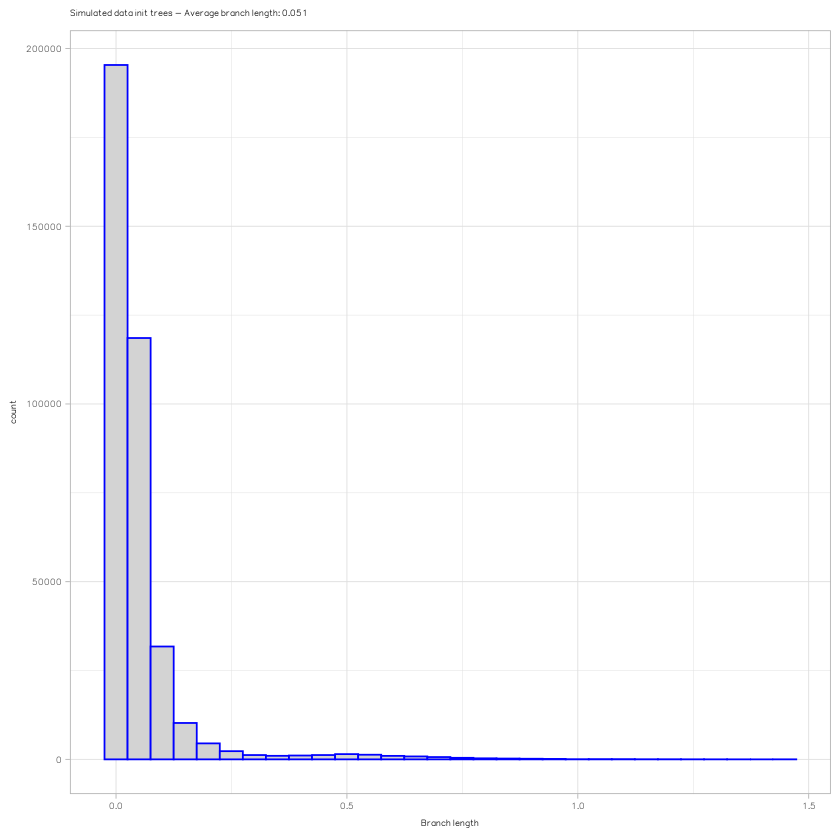

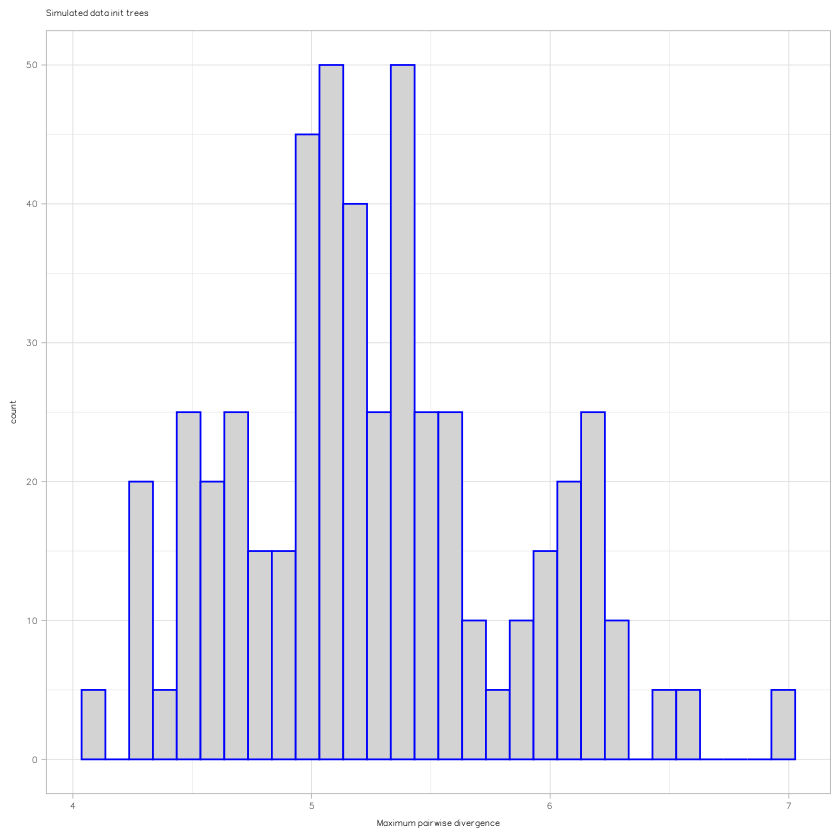

In [21]:
#
# Branch length and maximum pairwise distance ref trees
#

ggplot(as.data.frame(tot_edge_len),aes(x=tot_edge_len)) +
    geom_histogram(color = "blue", fill = "lightgray") +
    theme_light() +
    theme(plot.title = element_text(size = 12)) + 
    xlab("Branch length") + ggtitle(paste0("Simulated data init trees - Average branch length: ", round(mean(tot_edge_len),digits = 3)))


ggplot(as.data.frame(collect_diameter_ref),aes(x=collect_diameter_ref)) +
    geom_histogram(color = "blue", fill = "lightgray") +
    theme_light() +
    theme(plot.title = element_text(size = 12)) + 
    xlab("Maximum pairwise divergence") + ggtitle(paste0("Simulated data init trees"))


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



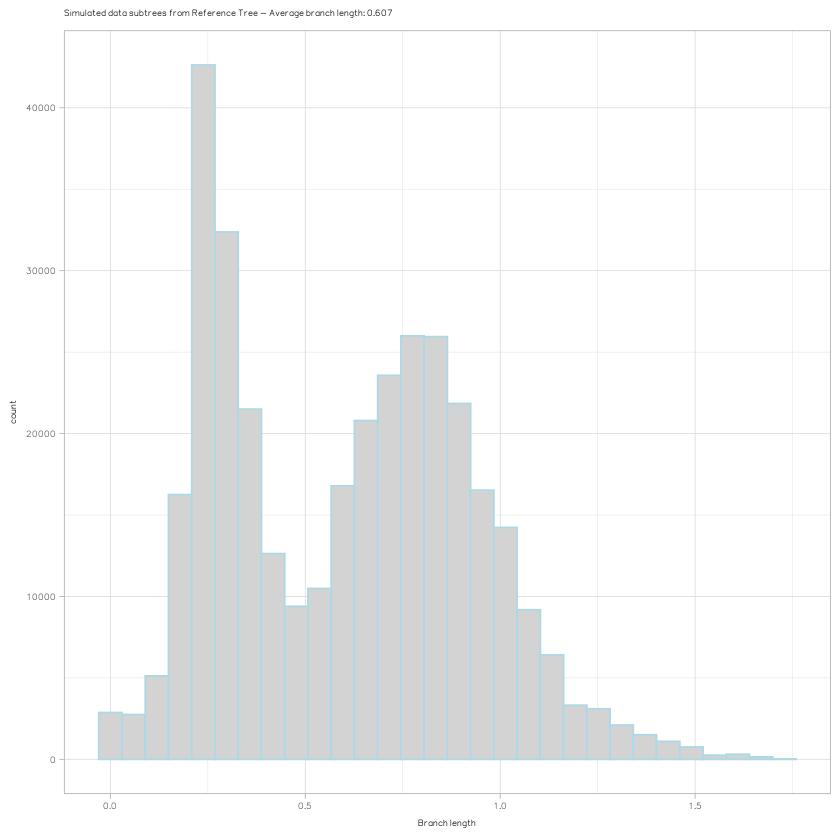

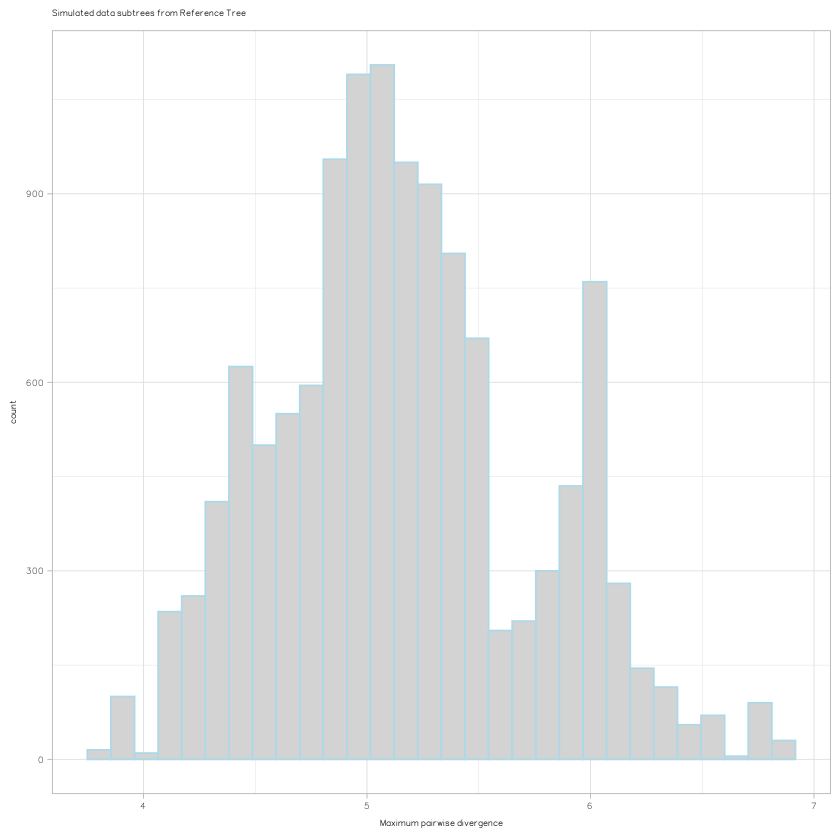

In [18]:
#
# Branch length and maximum pairwise distance subtrees from Reference trees
#

ggplot(as.data.frame(collect_branch_len_sub_from_ref),aes(x=collect_branch_len_sub_from_ref)) +
    geom_histogram(color = "lightblue", fill = "lightgray") +
    theme_light() +
    theme(plot.title = element_text(size = 11)) + 
    xlab("Branch length") + ggtitle(paste0("Simulated data subtrees from Reference Tree - Average branch length: ", round(mean(collect_branch_len_sub_from_ref),digits = 3)))

ggplot(as.data.frame(collect_diameter_sub_from_ref),aes(x=collect_diameter_sub_from_ref)) +
    geom_histogram(color = "lightblue", fill = "lightgray") +
    theme_light() +
    theme(plot.title = element_text(size = 11)) + 
    xlab("Maximum pairwise divergence") + ggtitle(paste0("Simulated data subtrees from Reference Tree"))



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



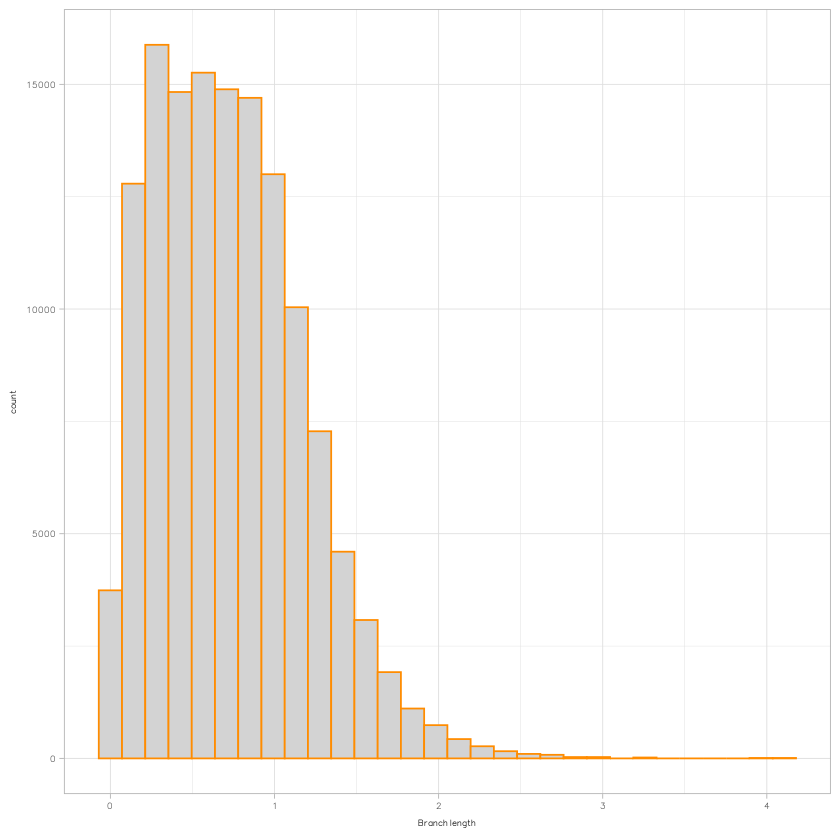

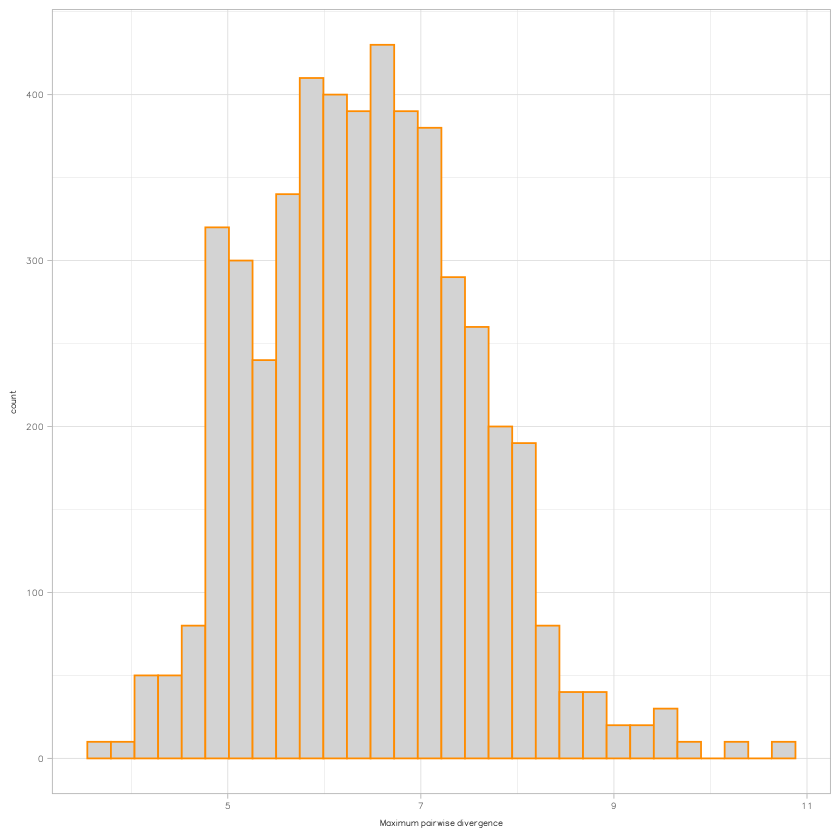

In [22]:
#
# Branch length and maximum pairwise distance Supermatrix_ML Trees
#


ggplot(as.data.frame(collect_branch_len_supermatrix_ml),aes(x=collect_branch_len_supermatrix_ml)) +
    geom_histogram(color = "darkorange", fill = "lightgray") +
    theme_light() +
    #theme(plot.title = element_text(size = 12)) + 
    xlab("Branch length") #+ ggtitle(paste0("Simulated data Supermatrix_ML Trees - Average branch length: ", round(mean(collect_branch_len_supermatrix_ml),digits = 3)))

ggplot(as.data.frame(collect_diameter_supermatrix_ml),aes(x=collect_diameter_supermatrix_ml)) +
    geom_histogram(color = "darkorange", fill = "lightgray") +
    theme_light() +
    #theme(plot.title = element_text(size = 12)) + 
    xlab("Maximum pairwise divergence") #+ ggtitle(paste0("Simulated data Supermatrix_ML Trees"))




In [15]:
#
# Internal vs external branches big trees
#

length(full_aln_tree$edge.length)
mean(full_aln_tree$edge.length[full_aln_tree$edge[,2] <= Ntip(full_aln_tree)]) / mean(full_aln_tree$edge.length[full_aln_tree$edge[,2] > Ntip(full_aln_tree)])



[1] 747

[1] 0.4605673

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



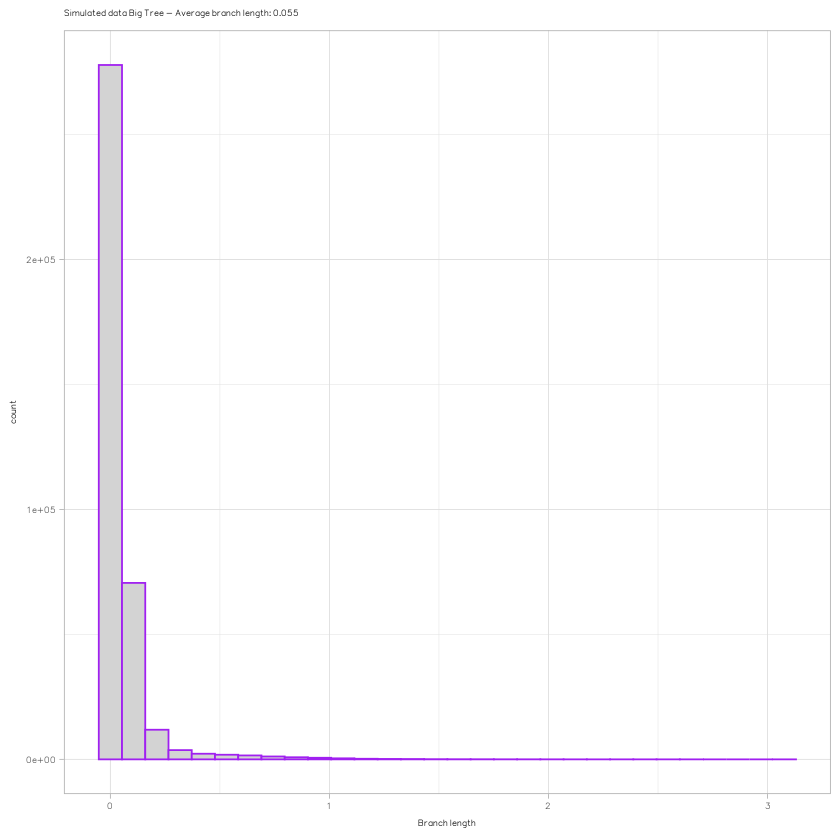

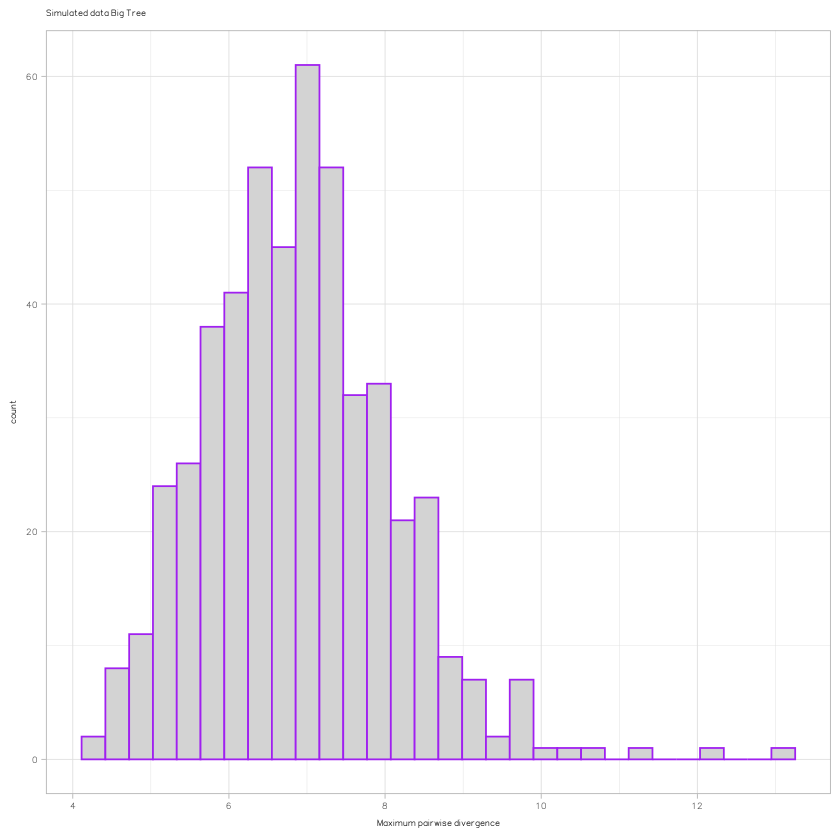

In [17]:
#
# Branch length and maximum pairwise distance big trees
#

ggplot(as.data.frame(collect_branch_len_big_trees),aes(x=collect_branch_len_big_trees)) +
    geom_histogram(color = "purple", fill = "lightgray") +
    theme_light() +
    theme(plot.title = element_text(size = 11)) + 
    xlab("Branch length") + ggtitle(paste0("Simulated data Big Tree - Average branch length: ", round(mean(collect_branch_len_big_trees),digits = 3)))

ggplot(as.data.frame(collect_diameter_big_trees),aes(x=collect_diameter_big_trees)) +
    geom_histogram(color = "purple", fill = "lightgray") +
    theme_light() +
    theme(plot.title = element_text(size = 11)) + 
    xlab("Maximum pairwise divergence") + ggtitle(paste0("Simulated data Big Tree"))


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



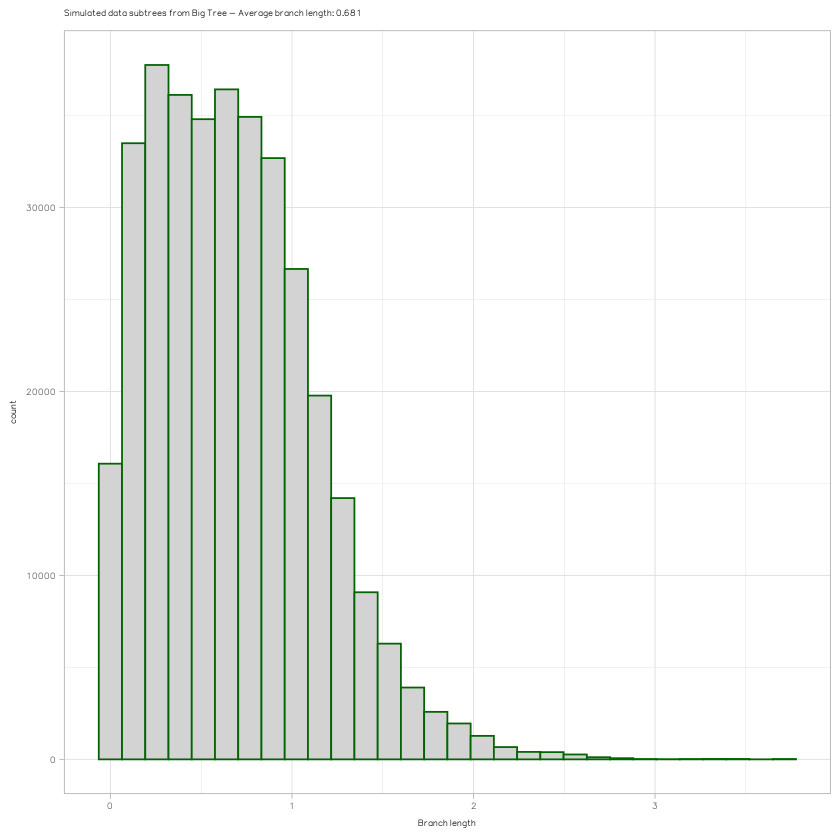

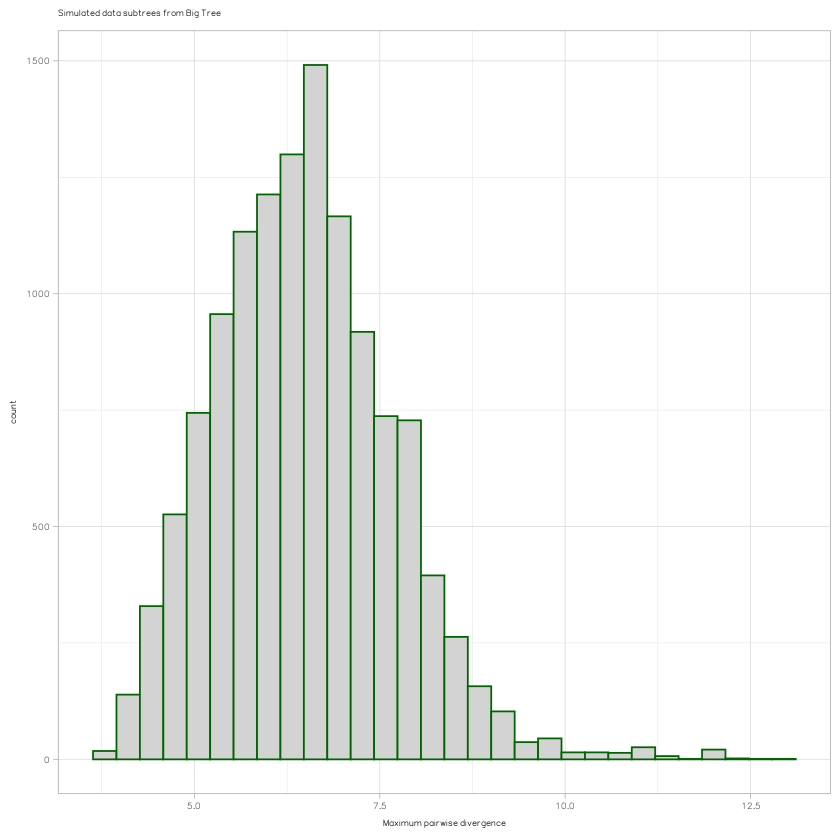

In [19]:
#
# Branch length and maximum pairwise distance subtrees from full aln big tree
#

ggplot(as.data.frame(collect_branch_len),aes(x=collect_branch_len)) +
    geom_histogram(color = "darkgreen", fill = "lightgray") +
    theme_light() +
    theme(plot.title = element_text(size = 12)) + 
    xlab("Branch length") + ggtitle(paste0("Simulated data subtrees from Big Tree - Average branch length: ", round(mean(collect_branch_len),digits = 3)))

ggplot(as.data.frame(collect_diameter),aes(x=collect_diameter)) +
    geom_histogram(color = "darkgreen", fill = "lightgray") +
    theme_light() +
    theme(plot.title = element_text(size = 12)) + 
    xlab("Maximum pairwise divergence") + ggtitle(paste0("Simulated data subtrees from Big Tree"))



In [ ]:

############ DO NOT RUN THIS CHUNK #############

#
#  Consense trees VS true topologies
#


mean_rf_true_top_consense_fastme_and_raxml = c()
se_rf_true_top_consense_fastme_and_raxml = c()

run_dirs = grep("rerun_sim_b_factor*",list.dirs(path = ".",recursive = FALSE),value = TRUE)
#for (run in run_dirs) {
    run = './rerun_sim_b_factor_3.5_avg_branchlen_0.7_from_23th_50_fams_25_species'
    print(basename(run))
    setwd(run)

    ref_codefile = read.table(file = "../../ref_tree.code")
    fam_dirs = grep("avg_branchlen*",list.dirs(path = ".",recursive = FALSE),value = TRUE)
    count_fam = 0

    avg_branch_length = c()
    orgs<-read.table(file = "../../orthologs_org_ids_to_concatenate")
    num_of_species = length(orgs$V1)

    #for (m in fam_dirs) {
        m = 'avg_branchlen_0.7_protein_family_100.sub'
        count_fam=count_fam+1
        curr_dir = paste(m,"/results",sep = "")
        print(basename(m))
        setwd(curr_dir)

        all_fastme_supertrees_consense = c()
        all_raxml_supertrees_consense = c()

        #for (myunit in 1:length(orgs$V1)) {
            myunit = 9
            #for (mysample in 1:10) {
                mysample = 9
                temp_fastme_supertrees <- read.tree(paste0("unit_",myunit,"_sample_",mysample,"_concatenated_aln.phylip_fastme_tree_for_supertree.nwk"),keep.multi=TRUE)
                temp_fastme_supertrees = unroot(temp_fastme_supertrees)
                if (length(which(is.binary(temp_fastme_supertrees) == FALSE)) != 0) {
                    for (tree in which(is.binary(temp_fastme_supertrees) == FALSE)) {
                        temp_fastme_supertrees[[tree]] = multi2di(temp_fastme_supertrees[[tree]])
                    }
                }
                test_fastme_consense = Rconsense(trees = temp_fastme_supertrees,path = "/users/cn/abaltzis/bin",method = "majority",quiet = TRUE)
                test_fastme_consense = as.multiPhylo(test_fastme_consense)
                all_fastme_supertrees_consense = c(all_fastme_supertrees_consense,test_fastme_consense)

                temp_raxml_supertrees <- read.tree(paste0("unit_",myunit,"_sample_",mysample,"_concatenated_aln.raxml_tree_for_supertree.nwk"),keep.multi=TRUE)
                temp_raxml_supertrees = unroot(temp_raxml_supertrees)
                if (length(which(is.binary(temp_raxml_supertrees) == FALSE)) != 0) {
                    for (tree in which(is.binary(temp_raxml_supertrees) == FALSE)) {
                        temp_raxml_supertrees[[tree]] = multi2di(temp_raxml_supertrees[[tree]])
                    }
                }
                test_raxml_consense = Rconsense(trees = temp_raxml_supertrees,path = "/users/cn/abaltzis/bin",method = "majority",quiet = TRUE)
                test_raxml_consense = as.multiPhylo(test_raxml_consense)
                all_raxml_supertrees_consense = c(all_raxml_supertrees_consense,test_raxml_consense)

            #}
        #}
        class(all_fastme_supertrees_consense) = "multiPhylo"
        class(all_raxml_supertrees_consense) = "multiPhylo"

        ref_tree <- read.tree(file=paste("../../sim_data/",basename(m),".nwk",sep=""),keep.multi=FALSE)
        #for (j in 1:length(ref_tree$tip.label)) { ref_tree$tip.label[j] = as.character(ref_codefile$V2[which(ref_codefile$V1 == ref_tree[["tip.label"]][j])])}
        ref_subtree=keep.tip(ref_tree,as.character(ref_codefile$V1))
        for (j in 1:length(ref_subtree$tip.label)) { ref_subtree$tip.label[j] = as.character(ref_codefile$V2[which(ref_codefile$V1 == ref_subtree[["tip.label"]][j])])}
        ref_subtree = unroot(ref_subtree)
        ref_subtree=list(ref_subtree)
        class(ref_subtree)="multiPhylo"
        subtree_out = paste("ref_subtree_",basename(m),".nwk",sep="")
        write.tree(ref_subtree,file=subtree_out)
        #for(x in 1:length(all_units_trees)) { for (j in 1:length(all_units_trees[[x]]$tip.label)) { all_units_trees[[x]]$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == all_units_trees[[x]][["tip.label"]][j])])}}
        avg_branch_length = c(avg_branch_length,mean(ref_subtree[[1]]$edge.length))

        all_trees = c(ref_subtree,all_fastme_supertrees_consense,all_raxml_supertrees_consense)
        class(all_trees)="multiPhylo"

        all_vs_all_rf=RF.dist(all_trees,normalize=TRUE)
        plotdata =data.matrix(all_vs_all_rf)

        selected_line = plotdata[1,-c(1)]
        for (i in seq(1,(num_of_species*10*2),by=10)) {
            mean_rf_true_top_consense_fastme_and_raxml = c(mean_rf_true_top_consense_fastme_and_raxml,mean(selected_line[i:(i+9)]))
            se_rf_true_top_consense_fastme_and_raxml =c(se_rf_true_top_consense_fastme_and_raxml,(sd(selected_line[i:(i+9)]/sqrt(10))))
        }


    if(FALSE) {
    units_names = c()
    for (i in 1:length(orgs$V1)) {units_names=c(units_names,paste("unit_",i,sep=""))}

    units_names=c(units_names,paste0("MRP_",units_names),paste0("raxml_",units_names),paste0("raxml_MRP_",units_names))

    }
        
        setwd("../../")
        #}
    
    setwd("../")
#}
    #mydf = data.frame("mean" = mean_rf_true_top_consense_fastme_and_raxml, "se" = se_rf_true_top_consense_fastme_and_raxml)
    #write.table(mydf,file = "rf_true_top_consense_fastme_and_raxml.tsv",quote=FALSE,row.names = FALSE)


[1] 225

[1] 0.9538206

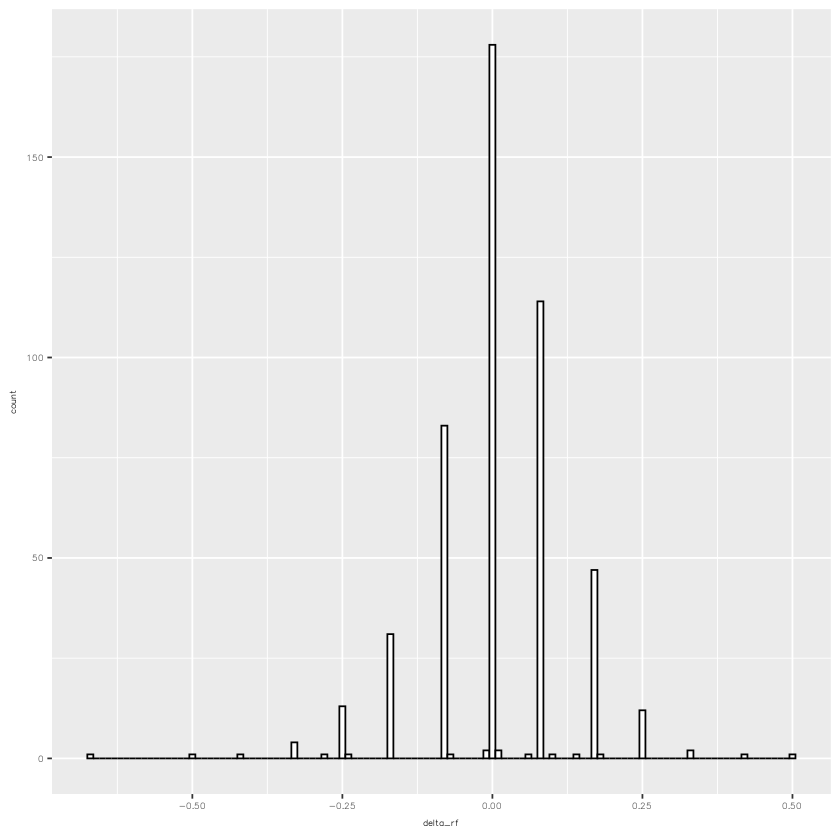

In [23]:
#
# Histogram of the difference between the RF [Supermatrix_ML(unit_25) vs Ref tree] and the average RF [subtrees_from_Big_tree vs Ref tree] 
#


df_new = read.table("avg_RF_between_ref_supermatrix_and_supertree.tsv",header=T)
rf_df_new = df_new[,1:100]
delta_rf = rf_df_new$raxml_unit_25 - mean_rf_subtrees_from_full_aln_vs_true_tree
ggplot(as.data.frame(delta_rf), aes(x=delta_rf)) +
    geom_histogram(binwidth=.01, colour="black", fill="white")

length(which(delta_rf > 0))
#delta_rf

res_wilcox = wilcox.test(rf_df_new$raxml_unit_25,mean_rf_subtrees_from_full_aln_vs_true_tree)
round(res_wilcox$p.value,digits = 7)


In [ ]:
#
# Aln length (in bins) vs delta RF(Supermatrix_ML, ref) - RF(Big_tree,ref)
#

aln_length = read.table("alignments_length_per_sim_fam",header = FALSE)
delta_rf_df = data.frame(delta_rf,"aln_length"=aln_length$V1)
#delta_rf_df[order(delta_rf_df$aln_length.V1),]
delta_rf_df = delta_rf_df %>% mutate(length_bin = cut(aln_length, breaks=5))
delta_rf_df$length_bin = as.factor(delta_rf_df$length_bin)
ggplot(delta_rf_df,aes(x=length_bin, y=delta_rf, fill=length_bin)) +
    geom_violin(trim = FALSE) +
    geom_boxplot(width=0.1, alpha=0.6) +
    theme_light()

delta_rf_df = delta_rf_df %>% mutate(length_bin = cut(aln_length, breaks=5))
#ggplot(delta_rf_df,aes(x=aln_length, y=delta_rf, color=length_bin)) +
#    geom_point()

delta_rf_df = data.frame("Supermatrix_ML" = rf_df_new$raxml_unit_25, "Big_tree" = mean_rf_subtrees_from_full_aln_vs_true_tree)
delta_rf_df$delta_rf = delta_rf_df$Supermatrix_ML - delta_rf_df$Big_tree
delta_rf_df$aln_length = aln_length$V1
delta_rf_df = delta_rf_df %>% mutate(length_bin = cut(aln_length, breaks=5))
#ggplot(delta_rf_df,aes(x=Supermatrix_ML, y=Big_tree, color=length_bin)) +
#    geom_point() +
#    theme_light()

#plot(aln_length$V1,delta_rf)
#length(which( delta_rf[1:100] < 0))
#length(which( delta_rf[101:200] < 0))
#length(which( delta_rf[201:300] < 0))
#length(which( delta_rf[301:400] < 0))
#length(which( delta_rf[401:500] < 0))


In [ ]:
delta_rf_df_melted_for_grouped_box = melt(delta_rf_df[,c("Supermatrix_ML","Big_tree","length_bin")],varnames = c("Supermatrix_ML","Big_tree"),id.vars = "length_bin")
colnames(delta_rf_df_melted_for_grouped_box) = c("length_bin","Method","RF")
ggplot(delta_rf_df_melted_for_grouped_box, aes(x=length_bin,y = RF,fill=Method)) +
    geom_boxplot(width=0.6) +
    theme_light() +
    scale_fill_brewer()

In [27]:
run_dirs = grep("rerun_sim_b_factor*",list.dirs(path = ".",recursive = FALSE),value = TRUE)
for (run in run_dirs) {
    #run = "rerun_sim_b_factor_3.5_avg_branchlen_0.7_from_23th_50_fams_25_species"
    print(basename(run))
    setwd(run)
    
    tracefile = read.table("trace_cpu_time.txt",header = TRUE)
    
    tracefile_mod = tracefile[grep("simulated_data:run_phylo_ML_supermatrix_aln_sim|simulated_data:only_concatenate_aln_sim|simulated_data:run_phylo_ML_full_aln_sim",tracefile$native_id),c("name","native_id","realtime")]
    tracefile_mod_wide = spread(tracefile_mod,native_id,realtime)
    tracefile_mod_wide$Supermatrix_ML = as.numeric(tracefile_mod_wide$`simulated_data:only_concatenate_aln_sim`) + as.numeric(tracefile_mod_wide$`simulated_data:run_phylo_ML_supermatrix_aln_sim`)
    tracefile_mod_wide = tracefile_mod_wide[,c(1,3,5)]
    colnames(tracefile_mod_wide)[2] = "Big_Tree"
    tracefile_mod_wide$Big_Tree = as.numeric(tracefile_mod_wide$Big_Tree)
    tracefile_mod_wide$group = rep(basename(run),100)
    tracefile_mod_wide
    
    if(run == run_dirs[1]) {
        fin_tracefile_mod_wide = tracefile_mod_wide
    } else {
        fin_tracefile_mod_wide = rbind(fin_tracefile_mod_wide,tracefile_mod_wide)
    }
    
    setwd("..")
}

[1] "rerun_sim_b_factor_3.5_avg_branchlen_0.7_from_11th_17th_20th_22th_and_23th_50_fams_25_species"
[1] "rerun_sim_b_factor_3.5_avg_branchlen_0.7_from_17th_20th_22th_and_23th_50_fams_25_species"
[1] "rerun_sim_b_factor_3.5_avg_branchlen_0.7_from_20th_22th_and_23th_50_fams_25_species"
[1] "rerun_sim_b_factor_3.5_avg_branchlen_0.7_from_22th_and_23th_50_fams_25_species"
[1] "rerun_sim_b_factor_3.5_avg_branchlen_0.7_from_23th_50_fams_25_species"


In [28]:
round(colMeans(fin_tracefile_mod_wide[,c(2,3)])/1000,digits = 2)
round(median(fin_tracefile_mod_wide$Big_Tree)/1000,digits = 2)
round(median(fin_tracefile_mod_wide$Supermatrix_ML)/1000,digits = 2)


Big_Tree Supermatrix_ML 
        638.12          67.76

[1] 588.3

[1] 63.85

Using name, group as id variables



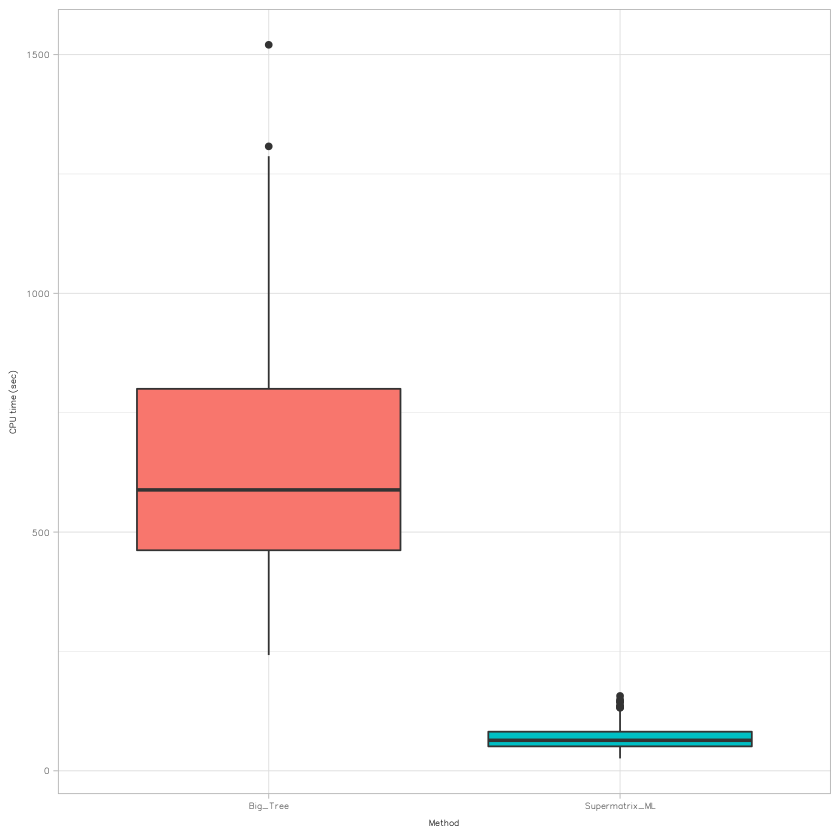

In [29]:
#
# Cpu time vs Method (Supermatrix_ML and Big tree)
#

fin_tracefile_mod_wide_melted = melt(fin_tracefile_mod_wide)
fin_tracefile_mod_wide_melted$value = fin_tracefile_mod_wide_melted$value / 1000
colnames(fin_tracefile_mod_wide_melted) = c("name","group","Method","Time")
p = ggplot(fin_tracefile_mod_wide_melted,aes(x=Method,y=Time,fill=Method)) +
    geom_boxplot(show.legend = FALSE) +
    theme_light() +
    ylab("CPU time (sec)") + xlab("Method")
ggsave(filename="CPU_time_per_method.png", plot=p, dpi = "retina")

Warning message:
“Use of `rf_df_new_means_melted$Topology` is discouraged. Use `Topology` instead.”
Warning message:
“Use of `rf_df_new_means_melted$Topology` is discouraged. Use `Topology` instead.”
Warning message:
“Use of `rf_df_new_means_melted$Topology` is discouraged. Use `Topology` instead.”
Warning message:
“Use of `rf_df_new_means_melted$Topology` is discouraged. Use `Topology` instead.”


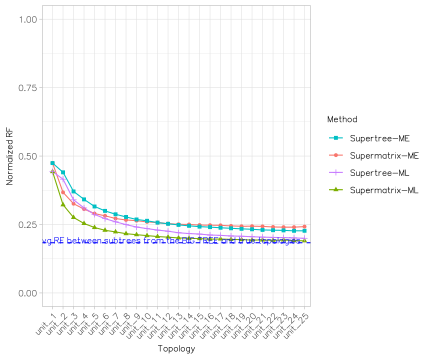

In [19]:
#
# Fig 2
#

options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res = 300)
#
# Average RF per unit for supermatrix and supertree ME and ML (lineplot)
#


df_big_tree = read.table("avg_RF_between_ref_big_tree_subtrees.tsv")
mean_rf_subtrees_from_full_aln_vs_true_tree = df_big_tree$V1
df_new = read.table("avg_RF_between_ref_supermatrix_and_supertree.tsv",header=T)
rf_df_new = df_new[,1:100]
#colnames(rf_df_new)=c(unit_names,paste0("MRL_",unit_names),paste0("MRP_",unit_names))
rf_df_new_means = colMeans(rf_df_new)
rf_df_new_means_melted = melt(rf_df_new_means)
colnames(rf_df_new_means_melted)[1] = "RF"
rf_df_new_means_melted$Topology = c(rep(colnames(rf_df_new)[1:25],4))
rf_df_new_means_melted$Method = c(rep("Supermatrix-ME",25),rep("Supertree-ME",25),rep("Supermatrix-ML",25),rep("Supertree-ML",25))
rf_df_new_means_melted = rf_df_new_means_melted[mixedorder(rf_df_new_means_melted$Topology),]
#rf_df_new_means_melted = rf_df_new_means_melted[which(rf_df_new_means_melted$Method != "MRL_Supertree_ML" & rf_df_new_means_melted$Method != "MRL_Supertree_ME"),]
p = ggplot(rf_df_new_means_melted, aes(x=factor(rf_df_new_means_melted$Topology, levels = colnames(rf_df_new)[1:25]), y=RF, group=Method,color=Method)) + 
    geom_line() + 
    geom_point(aes(shape=Method)) +
    geom_hline(yintercept=mean(mean_rf_subtrees_from_full_aln_vs_true_tree), linetype="dashed", color = "blue") +
    annotate("text", x = 12, y=mean(mean_rf_subtrees_from_full_aln_vs_true_tree)-0.02, label="Avg RF between subtrees from the BIG TREE and true topologies", size=3, color="blue") +
    theme_light() + 
    theme(axis.text.x=element_text(angle = 45, hjust = 1),legend.position="right") + 
    ylab("Normalized RF") + xlab("Topology") + 
    #coord_cartesian(ylim = c(0,1)) +
    scale_y_continuous(limits = c(0,0.5)) +
    #expand_limits(x = 0, y = 1) +
    scale_color_discrete(breaks=c("Supertree-ME","Supermatrix-ME","Supertree-ML","Supermatrix-ML")) + 
    scale_shape_discrete(breaks=c("Supertree-ME","Supermatrix-ME","Supertree-ML","Supermatrix-ML"))
p
ggsave(filename="RF_lineplot.png", plot=p, dpi = "retina")



In [ ]:
#
# Old lineplot DO NOT RUN


#options(repr.plot.width = 20, repr.plot.height = 6, repr.plot.res = 300)
#
# Average RF per unit for supermatrix and supertree ME and ML (lineplot)
#

df_new = read.table("avg_RF_between_ref_supermatrix_and_supertree.tsv",header=T)
rf_df_new = df_new[,1:100]
#colnames(rf_df_new)=c(unit_names,paste0("MRL_",unit_names),paste0("MRP_",unit_names))
rf_df_new_means = colMeans(rf_df_new)
rf_df_new_means_melted = melt(rf_df_new_means)
colnames(rf_df_new_means_melted)[1] = "RF"
rf_df_new_means_melted$Topology = c(rep(colnames(rf_df_new)[1:25],4))
rf_df_new_means_melted$Method = c(rep("Supermatrix-ME",25),rep("Supertree-ME",25),rep("Supermatrix-ML",25),rep("Supertree-ML",25))
rf_df_new_means_melted = rf_df_new_means_melted[mixedorder(rf_df_new_means_melted$Topology),]
#rf_df_new_means_melted = rf_df_new_means_melted[which(rf_df_new_means_melted$Method != "MRL_Supertree_ML" & rf_df_new_means_melted$Method != "MRL_Supertree_ME"),]
p = ggplot(rf_df_new_means_melted, aes(x=factor(rf_df_new_means_melted$Topology, levels = colnames(rf_df_new)[1:25]), y=RF, group=Method,color=Method)) + 
    geom_line() + 
    geom_point(aes(shape=Method)) + 
    theme_light() + 
    theme(axis.text.x=element_text(angle = 45, hjust = 1, size = 8),legend.position="right") + 
    ylab("Normalized RF") + xlab("Topology") + 
    #coord_cartesian(ylim = c(0,1)) +
    #scale_y_continuous(limits = c(0,1)) +
    #expand_limits(x = 0, y = 1) +
    scale_color_discrete(breaks=c("Supertree-ME","Supermatrix-ME","Supertree-ML","Supermatrix-ML")) + 
    scale_shape_discrete(breaks=c("Supertree-ME","Supermatrix-ME","Supertree-ML","Supermatrix-ML")) +
    facet_zoom(ylim = c(0.1,0.4))
#ggsave("avg_RF_lineplot_supermatrix_and_supertrees.png",dpi="retina")
#j=ggplot(rf_df_new_means_melted, aes(x=factor(rf_df_new_means_melted$Topology, levels = colnames(rf_df_new)[1:25]), y=RF, group=Method,color=Method)) + geom_line() + geom_point(aes(shape=Method)) + theme_light() + theme(axis.text.x=element_text(angle = 45, hjust = 1, size = 8),legend.position="right") + ylab("Normalized RF") + xlab("Topology") + scale_y_continuous(limits = c(0.1,0.4)) + scale_color_discrete(breaks=c("MRP_Supertree_ME","Supermatrix_ME","MRP_Supertree_ML","Supermatrix_ML")) + scale_shape_discrete(breaks=c("MRP_Supertree_ME","Supermatrix_ME","MRP_Supertree_ML","Supermatrix_ML"))
#grid.arrange(p,j)

p0 <- p
p1 <- p + scale_y_continuous(limits = c(0, 1))
p2 <- p + coord_cartesian(ylim = c(0, 1))

# convert ggplot objects to form suitable for rendering
gp0 <- ggplot_build(p0)
gp1 <- ggplot_build(p1)

# re-set zoomed facet's limits to match zoomed range
k <- gp1$layout$layout$SCALE_Y[gp1$layout$layout$name == "y"]
gp1$layout$panel_scales_y[[k]]$limits <- gp1$layout$panel_scales_y[[k]]$range$range 

# re-set zoomed facet's panel parameters based on original version p0
k <- gp1$layout$layout$PANEL[gp1$layout$layout$name == "y"]
gp1$layout$panel_params[[k]] <- gp0$layout$panel_params[[k]]

# convert built ggplot object to gtable of grobs as usual & print result
gt1 <- ggplot_gtable(gp1)
grid.draw(gt1)
ggsave(filename="RF_lineplot.png", plot=gt1, dpi = "retina", width = 20, height = 6)



In [51]:
#
# Wilcoxon Test on Supermatrix-ME-Unit-25 and Supermatrix-ML-Unit-25
#
res_wilcox = wilcox.test(rf_df_new[,c(25)],rf_df_new[,c(75)],paired = FALSE)
round(res_wilcox$p.value,digits = 8)


[1] 0

In [52]:
#
# Wilcoxon Test on Supermatrix-ML-Unit-25 and Supertree-ML-Unit-25
#

res_wilcox = wilcox.test(rf_df_new[,c(75)],rf_df_new[,c(100)],paired = FALSE)
round(res_wilcox$p.value,digits = 2)


[1] 0.06

In [53]:
#
# Wilcoxon Test on Supermatrix-ME-Unit-25 and Supertree-ME-Unit-25
#
nrow(rf_df_new[,c(25,50)])
res_wilcox = wilcox.test(rf_df_new[,c(25)],rf_df_new[,c(50)],paired = FALSE)
round(res_wilcox$p.value,digits = 2)


[1] 500

[1] 0.1

In [54]:
#
# Table1
#


rf_df_new_means_unmelted = dcast(rf_df_new_means_melted,formula = Method~Topology,value.var = "RF")
table1 = data.frame(Method = rf_df_new_means_unmelted$Method,"Unit 1" = round(rf_df_new_means_unmelted$unit_1,digits = 2),"Unit 25" = round(rf_df_new_means_unmelted$unit_25,digits = 2),"Difference" = round(rf_df_new_means_unmelted$unit_1 - rf_df_new_means_unmelted$unit_25,digits = 2))
table1 = table1[order(table1$Difference,decreasing = T),]
write.table(table1, file="Table1_average_RF.tsv",quote=FALSE, sep="\t",row.names=FALSE)


In [55]:
#
# Supplementary Table 1 on all the 500 simulated families
#

rf_sub_dataframe_ME = rf_df_new[,c("unit_25","MRP_unit_25")]
colnames(rf_sub_dataframe_ME) = c("Supermatrix-ME","Supertree-ME")
fams_supermat_better_than_supert_me = length(which( (rf_sub_dataframe_ME$`Supermatrix-ME` < rf_sub_dataframe_ME$`Supertree-ME`) ))
fams_supert_better_than_supermat_me = length(which( (rf_sub_dataframe_ME$`Supertree-ME` < rf_sub_dataframe_ME$`Supermatrix-ME`) ))
fams_supert_equal_to_supermat_me = length(which( (rf_sub_dataframe_ME$`Supertree-ME` == rf_sub_dataframe_ME$`Supermatrix-ME`) ))
total_me = nrow(rf_sub_dataframe_ME)
supertree_vs_supermatrix_ME = c(fams_supermat_better_than_supert_me,fams_supert_better_than_supermat_me,fams_supert_equal_to_supermat_me,total_me)

rf_sub_dataframe_ML = rf_df_new[,c("raxml_unit_25","raxml_MRP_unit_25")]
colnames(rf_sub_dataframe_ML) = c("Supermatrix-ML","Supertree-ML")
fams_supermat_better_than_supert_ml = length(which( (rf_sub_dataframe_ML$`Supermatrix-ML` < rf_sub_dataframe_ML$`Supertree-ML`) ))
fams_supert_better_than_supermat_ml = length(which( (rf_sub_dataframe_ML$`Supertree-ML` < rf_sub_dataframe_ML$`Supermatrix-ML`) ))
fams_supert_equal_to_supermat_ml = length(which( (rf_sub_dataframe_ML$`Supertree-ML` == rf_sub_dataframe_ML$`Supermatrix-ML`) ))
total_ml = nrow(rf_sub_dataframe_ML)
supertree_vs_supermatrix_ML = c(fams_supermat_better_than_supert_ml,fams_supert_better_than_supermat_ml,fams_supert_equal_to_supermat_ml,total_ml)

supp_table1 = as.data.frame(t(data.frame(supertree_vs_supermatrix_ME,supertree_vs_supermatrix_ML)))
row.names(supp_table1) = c("ME","ML")
colnames(supp_table1) = c("Supermatrix more accurate than Supertree","Supertree more accurate than Supermatrix","Supermatrix equal to Supertree","Total")
write.table(supp_table1, file="Supp_Table1_supermatrix_vs_supertree.tsv",quote=FALSE, sep="\t",row.names=TRUE)
supp_table1


,Supermatrix more accurate than Supertree,Supertree more accurate than Supermatrix,Supermatrix equal to Supertree,Total
,<int>,<int>,<int>,<int>
ME,195,264,41,500
ML,247,195,58,500


In [59]:
rf_sub_dataframe_ME = rf_df_new[,c("unit_1","unit_25","MRP_unit_25")]
colnames(rf_sub_dataframe_ME) = c("Unit 1 - ME","Supermatrix-ME","Supertree-ME")

fams_supermat_better_than_supert_me = which( (rf_sub_dataframe_ME$`Supermatrix-ME` < rf_sub_dataframe_ME$`Supertree-ME`) & (rf_sub_dataframe_ME$`Supermatrix-ME` < rf_sub_dataframe_ME$`Unit 1 - ME`) & (rf_sub_dataframe_ME$`Supertree-ME` < rf_sub_dataframe_ME$`Unit 1 - ME`))
fams_supert_better_than_supermat_me = which( (rf_sub_dataframe_ME$`Supertree-ME` < rf_sub_dataframe_ME$`Supermatrix-ME`) & (rf_sub_dataframe_ME$`Supertree-ME` < rf_sub_dataframe_ME$`Unit 1 - ME`) & (rf_sub_dataframe_ME$`Supermatrix-ME` < rf_sub_dataframe_ME$`Unit 1 - ME`))


rf_sub_dataframe_ME_supermat_and_supert_better_than_unit_1 = rf_sub_dataframe_ME[c(fams_supermat_better_than_supert_me,fams_supert_better_than_supermat_me),]
nrow(rf_sub_dataframe_ME_supermat_and_supert_better_than_unit_1)

wilcox.test(rf_sub_dataframe_ME_supermat_and_supert_better_than_unit_1$`Supermatrix-ME`,rf_sub_dataframe_ME_supermat_and_supert_better_than_unit_1$`Supertree-ME`)


[1] 452


	Wilcoxon rank sum test with continuity correction

data:  rf_sub_dataframe_ME_supermat_and_supert_better_than_unit_1$`Supermatrix-ME` and rf_sub_dataframe_ME_supermat_and_supert_better_than_unit_1$`Supertree-ME`
W = 108732, p-value = 0.09288
alternative hypothesis: true location shift is not equal to 0


In [60]:
rf_sub_dataframe_ML = rf_df_new[,c("raxml_unit_1","raxml_unit_25","raxml_MRP_unit_25")]
colnames(rf_sub_dataframe_ML) = c("Unit 1 - ML","Supermatrix-ML","Supertree-ML")

fams_supermat_better_than_supert_ml = which( (rf_sub_dataframe_ML$`Supermatrix-ML` < rf_sub_dataframe_ML$`Supertree-ML`) & (rf_sub_dataframe_ML$`Supermatrix-ML` < rf_sub_dataframe_ML$`Unit 1 - ML`) & (rf_sub_dataframe_ML$`Supertree-ML` < rf_sub_dataframe_ML$`Unit 1 - ML`))
fams_supert_better_than_supermat_ml = which( (rf_sub_dataframe_ML$`Supertree-ML` < rf_sub_dataframe_ML$`Supermatrix-ML`) & (rf_sub_dataframe_ML$`Supertree-ML` < rf_sub_dataframe_ML$`Unit 1 - ML`) & (rf_sub_dataframe_ML$`Supermatrix-ML` < rf_sub_dataframe_ML$`Unit 1 - ML`))


rf_sub_dataframe_ML_supermat_and_supert_better_than_unit_1 = rf_sub_dataframe_ML[c(fams_supermat_better_than_supert_ml,fams_supert_better_than_supermat_ml),]
nrow(rf_sub_dataframe_ML_supermat_and_supert_better_than_unit_1)

wilcox.test(rf_sub_dataframe_ML_supermat_and_supert_better_than_unit_1$`Supermatrix-ML`,rf_sub_dataframe_ML_supermat_and_supert_better_than_unit_1$`Supertree-ML`)


[1] 436


	Wilcoxon rank sum test with continuity correction

data:  rf_sub_dataframe_ML_supermat_and_supert_better_than_unit_1$`Supermatrix-ML` and rf_sub_dataframe_ML_supermat_and_supert_better_than_unit_1$`Supertree-ML`
W = 87816, p-value = 0.05119
alternative hypothesis: true location shift is not equal to 0


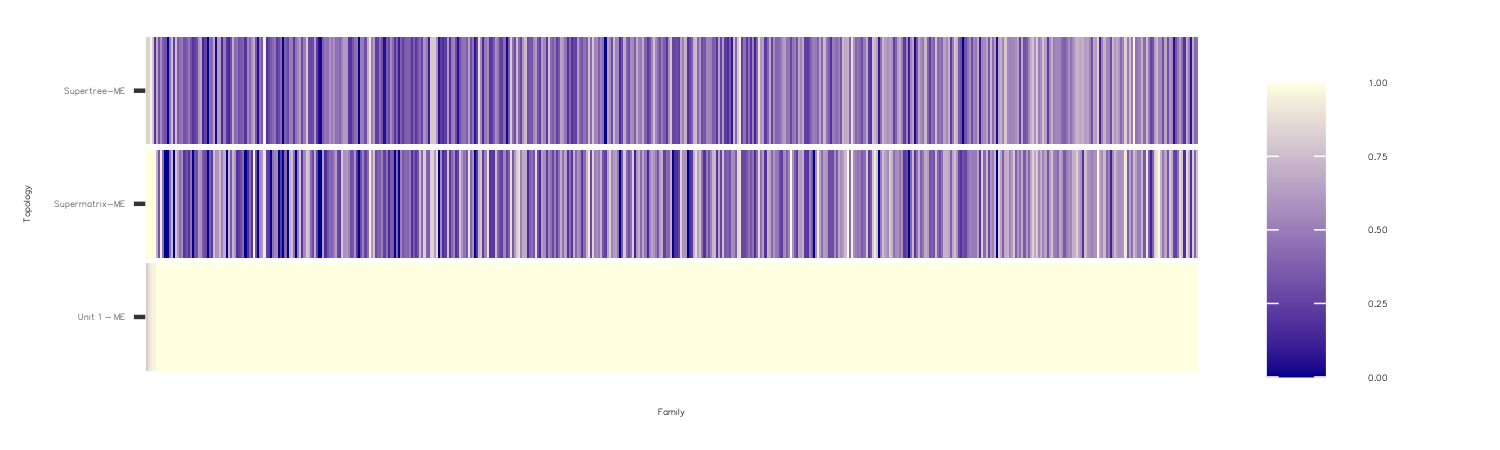

In [65]:
#
# Supp Fig 1a
#

options(repr.plot.width = 5, repr.plot.height = 1.5, repr.plot.res = 300)

rf_sub_dataframe_ME = rf_df_new[,c("unit_1","unit_25","MRP_unit_25")]
colnames(rf_sub_dataframe_ME) = c("Unit 1","Supermatrix","Supertree")
rf_sub_dataframe_ME$Max = apply(rf_sub_dataframe_ME,1,max)
rf_sub_dataframe_ME$Family = row.names(rf_sub_dataframe_ME)

rf_sub_dataframe_ME$`Unit 1` = rf_sub_dataframe_ME$`Unit 1` / rf_sub_dataframe_ME$Max
rf_sub_dataframe_ME$Supertree = rf_sub_dataframe_ME$Supertree / rf_sub_dataframe_ME$Max
rf_sub_dataframe_ME$Supermatrix = rf_sub_dataframe_ME$Supermatrix  / rf_sub_dataframe_ME$Max
rf_sub_dataframe_ME = subset(rf_sub_dataframe_ME, select = -c(Max))

colnames(rf_sub_dataframe_ME) = c("Unit 1 - ME","Supermatrix-ME","Supertree-ME","Family")
rf_sub_dataframe_ME_melted = melt(rf_sub_dataframe_ME, id = "Family")
colnames(rf_sub_dataframe_ME_melted) = c("Family","Topology","RF")
rf_sub_dataframe_ME_melted = rf_sub_dataframe_ME_melted[order(rf_sub_dataframe_ME_melted$Topology,rf_sub_dataframe_ME_melted$RF),]
mylevels = rf_sub_dataframe_ME_melted$Family[1:500]
rf_sub_dataframe_ME_melted$Family = factor(as.numeric(rf_sub_dataframe_ME_melted$Family),levels=mylevels)
p = ggplot(rf_sub_dataframe_ME_melted, aes(x=Family,y=Topology,fill=RF)) + 
geom_tile(aes(height=0.95)) + 
scale_fill_gradient(name = "relative RF",low = "darkblue", high = "lightyellow") +
theme(text = element_text(size=5),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        legend.title = element_text(size=5,vjust = 6), legend.text=element_text(size=4),
        legend.key.size = unit(0.5, 'cm')
        )
ggsave("heatmap_RF_ME.png", plot=p,dpi="retina", width = 5, height = 1.5)


In [63]:
total_me = length(which( (rf_sub_dataframe_ME$`Unit 1 - ME` == 1) & (rf_sub_dataframe_ME$`Supermatrix-ME` != 1) & (rf_sub_dataframe_ME$`Supertree-ME` != 1) ))
#length(which( (rf_sub_dataframe_ME$`Supermatrix-ME` == 1) & (rf_sub_dataframe_ME$`Supermatrix-ME` > rf_sub_dataframe_ME$`Unit 1 - ME`)))
#length(which( (rf_sub_dataframe_ME$`Supermatrix-ME` == 1) & (rf_sub_dataframe_ME$`Supertree-ME` == rf_sub_dataframe_ME$`Unit 1 - ME`)))

#length(which( (rf_sub_dataframe_ME$`Unit 1 - ME` == 1) & (rf_sub_dataframe_ME$`Supertree-ME` < rf_sub_dataframe_ME$`Supermatrix-ME`)))


#length(which( (rf_sub_dataframe_ME$`Supertree-ME` < rf_sub_dataframe_ME$`Supermatrix-ME`)))

#length(which( (rf_sub_dataframe_ME$`Supertree-ME` > rf_sub_dataframe_ME$`Unit 1 - ME`) & (rf_sub_dataframe_ME$`Supermatrix-ME` > rf_sub_dataframe_ME$`Unit 1 - ME`)))


supermat_better_than_supert_me = length(which( (rf_sub_dataframe_ME$`Supermatrix-ME` < rf_sub_dataframe_ME$`Supertree-ME`) & (rf_sub_dataframe_ME$`Supermatrix-ME` < rf_sub_dataframe_ME$`Unit 1 - ME`) & (rf_sub_dataframe_ME$`Supertree-ME` < rf_sub_dataframe_ME$`Unit 1 - ME`)))

supert_better_than_supermat_me = length(which( (rf_sub_dataframe_ME$`Supertree-ME` < rf_sub_dataframe_ME$`Supermatrix-ME`) & (rf_sub_dataframe_ME$`Supertree-ME` < rf_sub_dataframe_ME$`Unit 1 - ME`) & (rf_sub_dataframe_ME$`Supermatrix-ME` < rf_sub_dataframe_ME$`Unit 1 - ME`)))

supermat_equal_to_supert_me = length(which( (rf_sub_dataframe_ME$`Supertree-ME` == rf_sub_dataframe_ME$`Supermatrix-ME`) & (rf_sub_dataframe_ME$`Supertree-ME` < rf_sub_dataframe_ME$`Unit 1 - ME`) & (rf_sub_dataframe_ME$`Supermatrix-ME` < rf_sub_dataframe_ME$`Unit 1 - ME`)))

supertree_vs_supermatrix_ME = c(supermat_better_than_supert_me,supert_better_than_supermat_me,supermat_equal_to_supert_me,total_me)


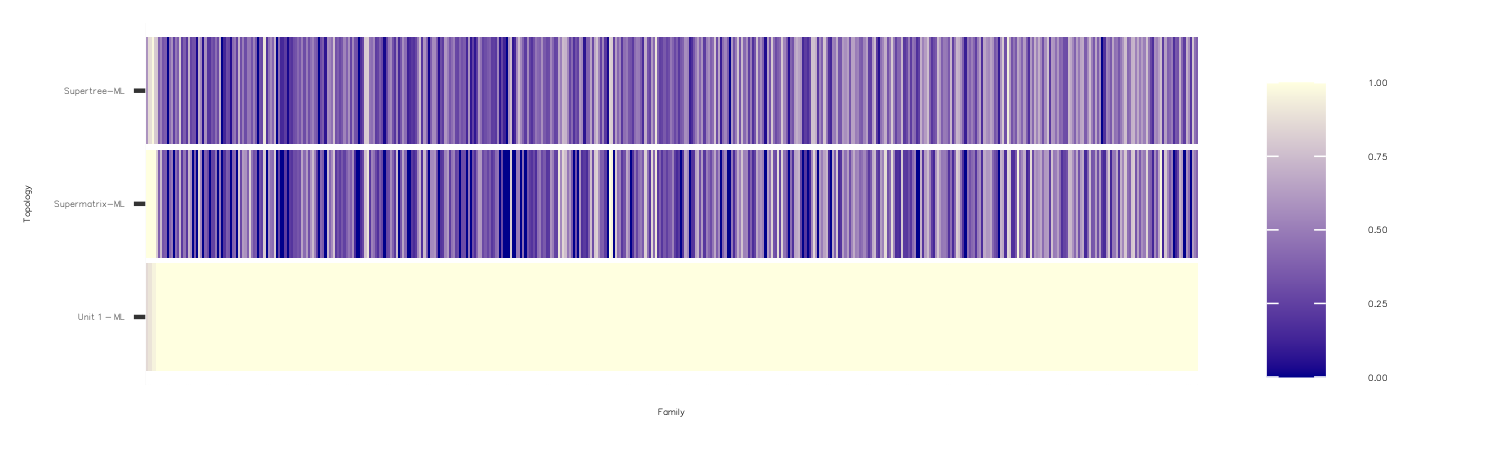

In [64]:
#
# Supp Fig 1b
#


options(repr.plot.width = 5, repr.plot.height = 1.5, repr.plot.res = 300)

rf_sub_dataframe_ML = rf_df_new[,c("raxml_unit_1","raxml_unit_25","raxml_MRP_unit_25")]
colnames(rf_sub_dataframe_ML) = c("Unit 1","Supermatrix","Supertree")
rf_sub_dataframe_ML$Max = apply(rf_sub_dataframe_ML,1,max)
rf_sub_dataframe_ML$Family = row.names(rf_sub_dataframe_ML)

rf_sub_dataframe_ML$`Unit 1` = rf_sub_dataframe_ML$`Unit 1` / rf_sub_dataframe_ML$Max
rf_sub_dataframe_ML$Supertree = rf_sub_dataframe_ML$Supertree / rf_sub_dataframe_ML$Max
rf_sub_dataframe_ML$Supermatrix = rf_sub_dataframe_ML$Supermatrix  / rf_sub_dataframe_ML$Max
rf_sub_dataframe_ML = subset(rf_sub_dataframe_ML, select = -c(Max))

colnames(rf_sub_dataframe_ML) = c("Unit 1 - ML","Supermatrix-ML","Supertree-ML","Family")
rf_sub_dataframe_ML_melted = melt(rf_sub_dataframe_ML, id = "Family")
colnames(rf_sub_dataframe_ML_melted) = c("Family","Topology","RF")
rf_sub_dataframe_ML_melted = rf_sub_dataframe_ML_melted[order(rf_sub_dataframe_ML_melted$Topology,rf_sub_dataframe_ML_melted$RF),]
mylevels = rf_sub_dataframe_ML_melted$Family[1:500]
rf_sub_dataframe_ML_melted$Family = factor(as.numeric(rf_sub_dataframe_ML_melted$Family),levels=mylevels)
p = ggplot(rf_sub_dataframe_ML_melted, aes(x=Family,y=Topology,fill=RF)) + 
geom_tile(aes(height=0.95)) + 
scale_fill_gradient(name = "relative RF", low = "darkblue", high = "lightyellow") +
theme(text = element_text(size=5),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        legend.title = element_text(size=5,vjust = 6), legend.text=element_text(size=4),
        legend.key.size = unit(0.5, 'cm')
        )
ggsave("heatmap_RF_ML.png",plot = p,dpi="retina", width = 5, height = 1.5)



In [ ]:
total_ml = length(which( (rf_sub_dataframe_ML$`Unit 1 - ML` == 1) & (rf_sub_dataframe_ML$`Supertree-ML` != 1) & (rf_sub_dataframe_ML$`Supermatrix-ML` != 1) ))
#length(which( (rf_sub_dataframe_ML$`Supertree-ML` == 1) & (rf_sub_dataframe_ML$`Supermatrix-ML` == 1)) )
#length(which(rf_sub_dataframe_ML$`Supertree-ML` == rf_sub_dataframe_ML$`Supermatrix-ML`))

#length(which( (rf_sub_dataframe_ML$`Supermatrix-ML` == 1) & (rf_sub_dataframe_ML$`Supermatrix-ML` > rf_sub_dataframe_ML$`Unit 1 - ML`)))
#length(which( (rf_sub_dataframe_ML$`Supermatrix-ML` == 1) & (rf_sub_dataframe_ML$`Supertree-ML` == rf_sub_dataframe_ML$`Unit 1 - ML`)))

#length(which( (rf_sub_dataframe_ML$`Unit 1 - ML` == 1) & (rf_sub_dataframe_ML$`Supertree-ML` < rf_sub_dataframe_ML$`Supermatrix-ML`)))


#length(which( (rf_sub_dataframe_ML$`Supertree-ML` < rf_sub_dataframe_ML$`Supermatrix-ML`)))

#length(which( (rf_sub_dataframe_ML$`Supertree-ML` > rf_sub_dataframe_ML$`Unit 1 - ML`) & (rf_sub_dataframe_ML$`Supermatrix-ML` > rf_sub_dataframe_ML$`Unit 1 - ML`)))


supermat_better_than_supert_ml = length(which( (rf_sub_dataframe_ML$`Supermatrix-ML` < rf_sub_dataframe_ML$`Supertree-ML`) & (rf_sub_dataframe_ML$`Supermatrix-ML` < rf_sub_dataframe_ML$`Unit 1 - ML`) & (rf_sub_dataframe_ML$`Supertree-ML` < rf_sub_dataframe_ML$`Unit 1 - ML`)))

supert_better_than_supermat_ml = length(which( (rf_sub_dataframe_ML$`Supertree-ML` < rf_sub_dataframe_ML$`Supermatrix-ML`) & (rf_sub_dataframe_ML$`Supertree-ML` < rf_sub_dataframe_ML$`Unit 1 - ML`) & (rf_sub_dataframe_ML$`Supermatrix-ML` < rf_sub_dataframe_ML$`Unit 1 - ML`)))

supermat_equal_to_supert_ml = length(which( (rf_sub_dataframe_ML$`Supertree-ML` == rf_sub_dataframe_ML$`Supermatrix-ML`) & (rf_sub_dataframe_ML$`Supertree-ML` < rf_sub_dataframe_ML$`Unit 1 - ML`) & (rf_sub_dataframe_ML$`Supermatrix-ML` < rf_sub_dataframe_ML$`Unit 1 - ML`)))

supertree_vs_supermatrix_ML = c(supermat_better_than_supert_ml,supert_better_than_supermat_ml,supermat_equal_to_supert_ml,total_ml)


Saving 6.67 x 6.67 in image



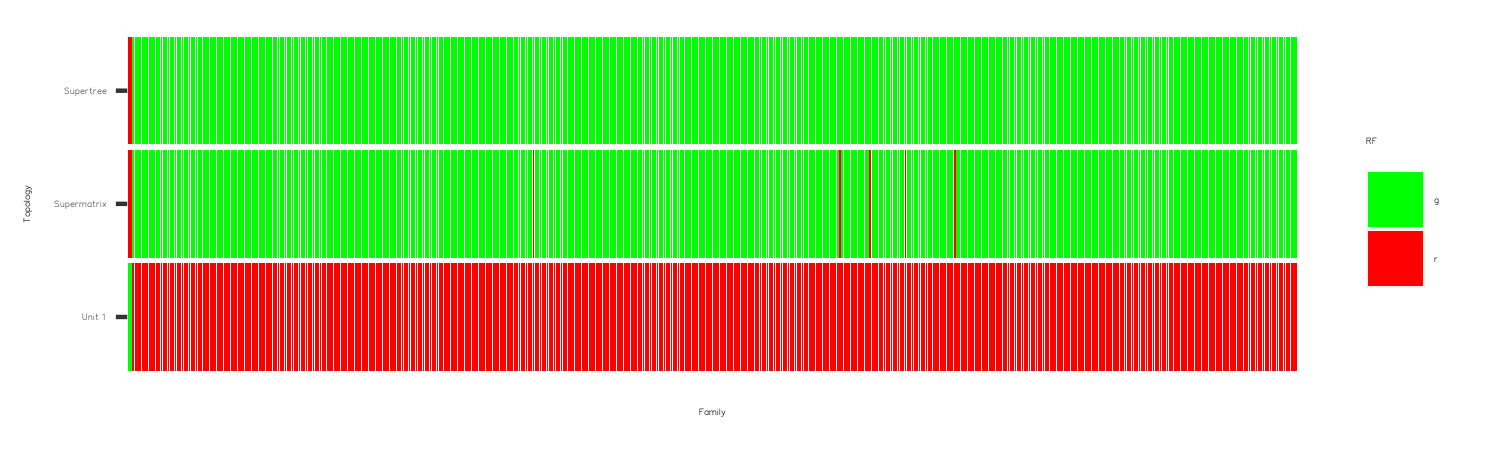

In [58]:
##### DO NOT RUN #######


options(repr.plot.width = 5, repr.plot.height = 1.5, repr.plot.res = 300)

rf_sub_dataframe_ME = rf_df_new[,c("unit_1","unit_25","MRP_unit_25")]
colnames(rf_sub_dataframe_ME) = c("Unit 1","Supermatrix","Supertree")
rf_sub_dataframe_ME$Family = row.names(rf_sub_dataframe_ME)
rf_sub_dataframe_ME$Unit_1_vs_Supermatrix = rf_sub_dataframe_ME$`Unit 1` - rf_sub_dataframe_ME$Supermatrix
rf_sub_dataframe_ME$Unit_1_vs_Supertree = rf_sub_dataframe_ME$`Unit 1` - rf_sub_dataframe_ME$Supertree
rf_sub_dataframe_ME$Supertree_vs_Supermatrix = rf_sub_dataframe_ME$Supertree - rf_sub_dataframe_ME$Supermatrix

rf_sub_dataframe_ME$Unit_1_col = rf_sub_dataframe_ME$`Unit 1`
rf_sub_dataframe_ME$Supermatrix_col = rf_sub_dataframe_ME$Supermatrix
rf_sub_dataframe_ME$Supertree_col = rf_sub_dataframe_ME$Supertree

myvector = which( (rf_sub_dataframe_ME$Unit_1_vs_Supermatrix == 0.00) & (rf_sub_dataframe_ME$Unit_1_vs_Supertree == 0.00) & (rf_sub_dataframe_ME$Supertree_vs_Supermatrix == 0.00) )
if (length(myvector) != 0) {
    rf_sub_dataframe_ME$Unit_1_col[myvector] = 'b'
    rf_sub_dataframe_ME$Supermatrix_col[myvector] = 'b'
    rf_sub_dataframe_ME$Supertree_col[myvector] = 'b'
}

myvector = which( (rf_sub_dataframe_ME$Unit_1_vs_Supermatrix == 0.00) & (rf_sub_dataframe_ME$Unit_1_vs_Supertree > 0))
if (length(myvector) != 0) {
    rf_sub_dataframe_ME$Unit_1_col[myvector] = 'r'
    rf_sub_dataframe_ME$Supermatrix_col[myvector] = 'r'
    rf_sub_dataframe_ME$Supertree_col[myvector] = 'g'
}

myvector = which( (rf_sub_dataframe_ME$Unit_1_vs_Supermatrix == 0.00) & (rf_sub_dataframe_ME$Unit_1_vs_Supertree < 0))
if (length(myvector) != 0) {
    rf_sub_dataframe_ME$Unit_1_col[myvector] = 'g'
    rf_sub_dataframe_ME$Supermatrix_col[myvector] = 'g'
    rf_sub_dataframe_ME$Supertree_col[myvector] = 'r'
}

myvector = which( (rf_sub_dataframe_ME$Unit_1_vs_Supermatrix > 0) & (rf_sub_dataframe_ME$Unit_1_vs_Supertree == 0.00))
if (length(myvector) != 0) {
    rf_sub_dataframe_ME$Unit_1_col[myvector] = 'r'
    rf_sub_dataframe_ME$Supermatrix_col[myvector] = 'g'
    rf_sub_dataframe_ME$Supertree_col[myvector] = 'r'
}

myvector = which( (rf_sub_dataframe_ME$Unit_1_vs_Supermatrix < 0) & (rf_sub_dataframe_ME$Unit_1_vs_Supertree == 0.00))
if (length(myvector) != 0) {
    rf_sub_dataframe_ME$Unit_1_col[myvector] = 'g'
    rf_sub_dataframe_ME$Supermatrix_col[myvector] = 'r'
    rf_sub_dataframe_ME$Supertree_col[myvector] = 'g'
}



myvector = which(rf_sub_dataframe_ME$Unit_1_vs_Supermatrix > 0)
if (length(myvector) != 0) {
    rf_sub_dataframe_ME$Unit_1_col[myvector] = 'r'
    rf_sub_dataframe_ME$Supermatrix_col[myvector] = 'g'
}
myvector = which(rf_sub_dataframe_ME$Unit_1_vs_Supermatrix < 0)
if (length(myvector) != 0) {
    rf_sub_dataframe_ME$Unit_1_col[myvector] = 'g'
    rf_sub_dataframe_ME$Supermatrix_col[myvector] = 'r'
}

myvector = which(rf_sub_dataframe_ME$Unit_1_vs_Supertree > 0)
if (length(myvector) != 0) {
    rf_sub_dataframe_ME$Unit_1_col[myvector] = 'r'
    rf_sub_dataframe_ME$Supertree_col[myvector] = 'g'
}


myvector = which(rf_sub_dataframe_ME$Unit_1_vs_Supertree < 0)
if (length(myvector) != 0) {
    rf_sub_dataframe_ME$Unit_1_col[myvector] = 'g'
    rf_sub_dataframe_ME$Supertree_col[myvector] = 'r'
}


rf_sub_dataframe_ME_heatmap = rf_sub_dataframe_ME[,c("Family","Unit_1_col","Supermatrix_col","Supertree_col")]
colnames(rf_sub_dataframe_ME_heatmap) = c("Family","Unit 1","Supermatrix","Supertree")
rf_sub_dataframe_ME_melted = melt(rf_sub_dataframe_ME_heatmap, id = "Family")
colnames(rf_sub_dataframe_ME_melted) = c("Family","Topology","RF")
rf_sub_dataframe_ME_melted = rf_sub_dataframe_ME_melted[order(rf_sub_dataframe_ME_melted$Topology,rf_sub_dataframe_ME_melted$RF),]
mylevels = rf_sub_dataframe_ME_melted$Family[1:500]
rf_sub_dataframe_ME_melted$Family = factor(as.numeric(rf_sub_dataframe_ME_melted$Family),levels=mylevels)
rf_sub_dataframe_ME_melted$RF = factor(rf_sub_dataframe_ME_melted$RF)

ggplot(rf_sub_dataframe_ME_melted, aes(x=Family,y=Topology,fill=RF)) + 
geom_tile(aes(width=0.8, height=0.95), size = 0.3) + 
scale_fill_manual(values = c("green","red")) +
theme(text = element_text(size=5),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        legend.title = element_text(size=4), legend.text=element_text(size=4),
        legend.key.size = unit(0.5, 'cm')
        )
ggsave("heatmap_RF_ME.png",dpi="retina")


In [ ]:
####### DO NOT RUN ########

options(repr.plot.width = 5, repr.plot.height = 1.5, repr.plot.res = 300)

rf_sub_dataframe_ML = rf_df_new[,c("raxml_unit_1","raxml_unit_25","raxml_MRP_unit_25")]
colnames(rf_sub_dataframe_ML) = c("Unit 1","Supermatrix","Supertree")
rf_sub_dataframe_ML$Family = row.names(rf_sub_dataframe_ML)
rf_sub_dataframe_ML$Unit_1_vs_Supermatrix = rf_sub_dataframe_ML$`Unit 1` - rf_sub_dataframe_ML$Supermatrix
rf_sub_dataframe_ML$Unit_1_vs_Supertree = rf_sub_dataframe_ML$`Unit 1` - rf_sub_dataframe_ML$Supertree
rf_sub_dataframe_ML$Supertree_vs_Supermatrix = rf_sub_dataframe_ML$Supertree - rf_sub_dataframe_ML$Supermatrix

rf_sub_dataframe_ML$Unit_1_col = rf_sub_dataframe_ML$`Unit 1`
rf_sub_dataframe_ML$Supermatrix_col = rf_sub_dataframe_ML$Supermatrix
rf_sub_dataframe_ML$Supertree_col = rf_sub_dataframe_ML$Supertree

myvector = which( (rf_sub_dataframe_ML$Unit_1_vs_Supermatrix == 0.00) & (rf_sub_dataframe_ML$Unit_1_vs_Supertree == 0.00) & (rf_sub_dataframe_ML$Supertree_vs_Supermatrix == 0.00) )
if (length(myvector) != 0) {
    rf_sub_dataframe_ML$Unit_1_col[myvector] = 'b'
    rf_sub_dataframe_ML$Supermatrix_col[myvector] = 'b'
    rf_sub_dataframe_ML$Supertree_col[myvector] = 'b'
}

myvector = which( (rf_sub_dataframe_ML$Unit_1_vs_Supermatrix == 0.00) & (rf_sub_dataframe_ML$Unit_1_vs_Supertree > 0))
if (length(myvector) != 0) {
    rf_sub_dataframe_ML$Unit_1_col[myvector] = 'r'
    rf_sub_dataframe_ML$Supermatrix_col[myvector] = 'r'
    rf_sub_dataframe_ML$Supertree_col[myvector] = 'g'
}

myvector = which( (rf_sub_dataframe_ML$Unit_1_vs_Supermatrix == 0.00) & (rf_sub_dataframe_ML$Unit_1_vs_Supertree < 0))
if (length(myvector) != 0) {
    rf_sub_dataframe_ML$Unit_1_col[myvector] = 'g'
    rf_sub_dataframe_ML$Supermatrix_col[myvector] = 'g'
    rf_sub_dataframe_ML$Supertree_col[myvector] = 'r'
}

myvector = which( (rf_sub_dataframe_ML$Unit_1_vs_Supermatrix > 0) & (rf_sub_dataframe_ML$Unit_1_vs_Supertree == 0.00))
if (length(myvector) != 0) {
    rf_sub_dataframe_ML$Unit_1_col[myvector] = 'r'
    rf_sub_dataframe_ML$Supermatrix_col[myvector] = 'g'
    rf_sub_dataframe_ML$Supertree_col[myvector] = 'r'
}

myvector = which( (rf_sub_dataframe_ML$Unit_1_vs_Supermatrix < 0) & (rf_sub_dataframe_ML$Unit_1_vs_Supertree == 0.00))
if (length(myvector) != 0) {
    rf_sub_dataframe_ML$Unit_1_col[myvector] = 'g'
    rf_sub_dataframe_ML$Supermatrix_col[myvector] = 'r'
    rf_sub_dataframe_ML$Supertree_col[myvector] = 'g'
}



myvector = which(rf_sub_dataframe_ML$Unit_1_vs_Supermatrix > 0)
if (length(myvector) != 0) {
    rf_sub_dataframe_ML$Unit_1_col[myvector] = 'r'
    rf_sub_dataframe_ML$Supermatrix_col[myvector] = 'g'
}
myvector = which(rf_sub_dataframe_ML$Unit_1_vs_Supermatrix < 0)
if (length(myvector) != 0) {
    rf_sub_dataframe_ML$Unit_1_col[myvector] = 'g'
    rf_sub_dataframe_ML$Supermatrix_col[myvector] = 'r'
}

myvector = which(rf_sub_dataframe_ML$Unit_1_vs_Supertree > 0)
if (length(myvector) != 0) {
    rf_sub_dataframe_ML$Unit_1_col[myvector] = 'r'
    rf_sub_dataframe_ML$Supertree_col[myvector] = 'g'
}


myvector = which(rf_sub_dataframe_ML$Unit_1_vs_Supertree < 0)
if (length(myvector) != 0) {
    rf_sub_dataframe_ML$Unit_1_col[myvector] = 'g'
    rf_sub_dataframe_ML$Supertree_col[myvector] = 'r'
}


rf_sub_dataframe_ML_heatmap = rf_sub_dataframe_ML[,c("Family","Unit_1_col","Supermatrix_col","Supertree_col")]
colnames(rf_sub_dataframe_ML_heatmap) = c("Family","Unit 1","Supermatrix","Supertree")
rf_sub_dataframe_ML_melted = melt(rf_sub_dataframe_ML_heatmap, id = "Family")
colnames(rf_sub_dataframe_ML_melted) = c("Family","Topology","RF")
rf_sub_dataframe_ML_melted = rf_sub_dataframe_ML_melted[order(rf_sub_dataframe_ML_melted$Topology,rf_sub_dataframe_ML_melted$RF),]
mylevels = rf_sub_dataframe_ML_melted$Family[1:500]
rf_sub_dataframe_ML_melted$Family = factor(as.numeric(rf_sub_dataframe_ML_melted$Family),levels=mylevels)
rf_sub_dataframe_ML_melted$RF = factor(rf_sub_dataframe_ML_melted$RF)

ggplot(rf_sub_dataframe_ML_melted, aes(x=Family,y=Topology,fill=RF)) + 
geom_tile(aes(width=0.8, height=0.95), size = 0.3) + 
scale_fill_manual(values = c("green","red")) +
theme(text = element_text(size=5),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        legend.title = element_text(size=4), legend.text=element_text(size=4),
        legend.key.size = unit(0.5, 'cm')
        )
ggsave("heatmap_RF_ML.png",dpi="retina")

Using Family as id variables

Saving 6.67 x 6.67 in image

Using Family as id variables



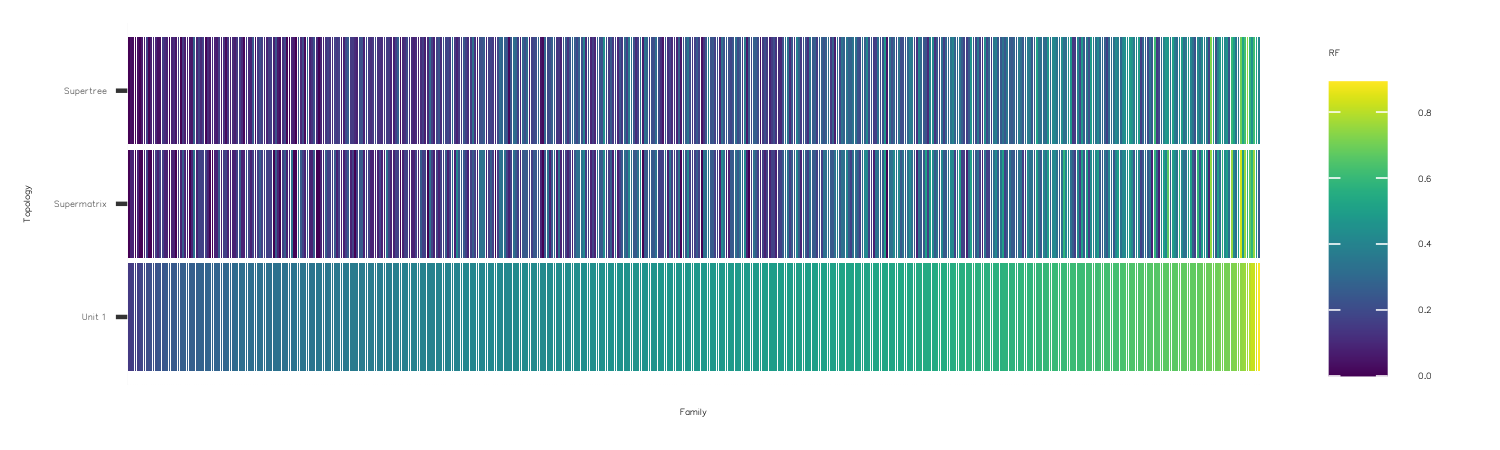

Saving 6.67 x 6.67 in image



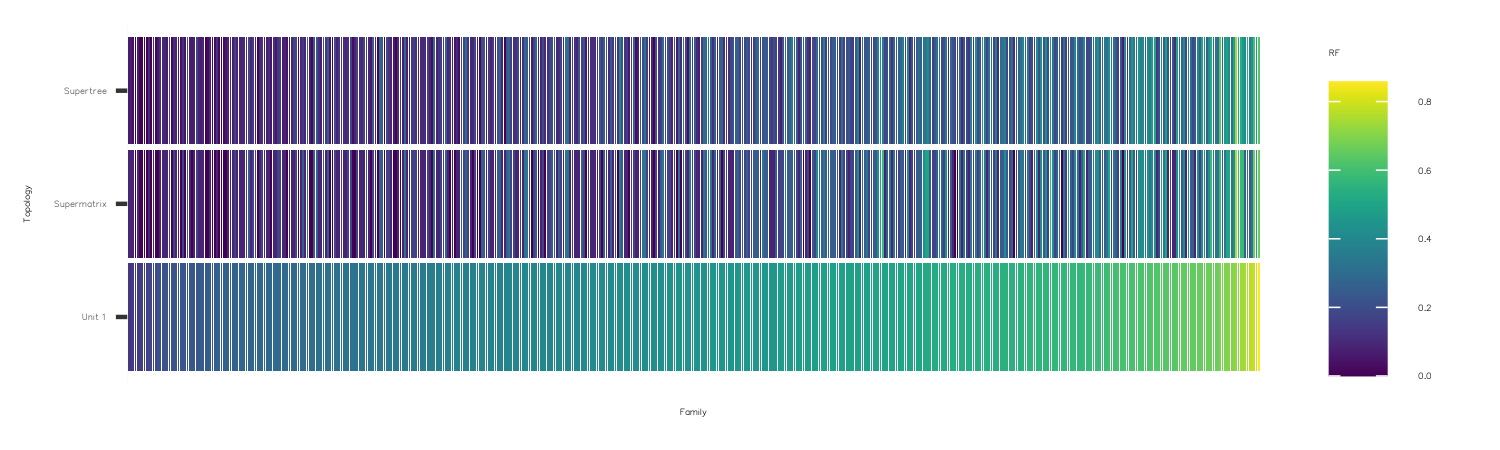

In [57]:
###### DO NOT RUN #######


options(repr.plot.width = 5, repr.plot.height = 1.5, repr.plot.res = 300)

rf_sub_dataframe_ME = rf_df_new[,c("unit_1","unit_25","MRP_unit_25")]
colnames(rf_sub_dataframe_ME) = c("Unit 1","Supermatrix","Supertree")
rf_sub_dataframe_ME$Family = row.names(rf_sub_dataframe_ME)
rf_sub_dataframe_ME_melted = melt(rf_sub_dataframe_ME)
colnames(rf_sub_dataframe_ME_melted) = c("Family","Topology","RF")
rf_sub_dataframe_ME_melted = rf_sub_dataframe_ME_melted[order(rf_sub_dataframe_ME_melted$Topology,rf_sub_dataframe_ME_melted$RF),]
mylevels = rf_sub_dataframe_ME_melted$Family[1:500]
rf_sub_dataframe_ME_melted$Family = factor(as.numeric(rf_sub_dataframe_ME_melted$Family),levels=mylevels)
ggplot(rf_sub_dataframe_ME_melted, aes(x=Family,y=Topology,fill=RF)) + 
geom_tile(aes(width=0.8, height=0.95), size=0.3) + 
scale_fill_viridis(discrete=FALSE) + 
theme(text = element_text(size=5),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        legend.title = element_text(size=4), legend.text=element_text(size=4),
        legend.key.size = unit(0.5, 'cm')
        )
ggsave("heatmap_RF_ME.png",dpi="retina")


rf_sub_dataframe_ML = rf_df_new[,c("raxml_unit_1","raxml_unit_25","raxml_MRP_unit_25")]
colnames(rf_sub_dataframe_ML) = c("Unit 1","Supermatrix","Supertree")
rf_sub_dataframe_ML$Family = row.names(rf_sub_dataframe_ML)
rf_sub_dataframe_ML = rf_sub_dataframe_ML[order(rf_sub_dataframe_ML$`Unit 1`),]
rf_sub_dataframe_ML_melted = melt(rf_sub_dataframe_ML)
colnames(rf_sub_dataframe_ML_melted) = c("Family","Topology","RF")
rf_sub_dataframe_ML_melted = rf_sub_dataframe_ML_melted[order(rf_sub_dataframe_ML_melted$Topology,rf_sub_dataframe_ML_melted$RF),]
mylevels = rf_sub_dataframe_ML_melted$Family[1:500]
rf_sub_dataframe_ML_melted$Family = factor(as.numeric(rf_sub_dataframe_ML_melted$Family),levels=mylevels)
ggplot(rf_sub_dataframe_ML_melted, aes(x=Family,y=Topology,fill=RF)) + 
geom_tile(aes(width=0.8, height=0.95), size=0.3) + 
scale_fill_viridis(discrete=FALSE) + 
theme(text = element_text(size=5),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        legend.title = element_text(size=4), legend.text=element_text(size=4),
        legend.key.size = unit(0.5, 'cm')
        )
ggsave("heatmap_RF_ML.png",dpi="retina")



In [ ]:
#
# Supermatrix vs Supertree venn diagrams
#
if (FALSE) {
    
unit_lengths_per_fam = read.table("avg_unit_len",header=F) 
pid_per_fam = read.table("all_sim_stats.tsv",header=F)

supermatrix_vs_MRP = data.frame(supermatrix=rf_df_new$unit_25, MRP_supertree=rf_df_new$MRP_unit_25,BS_supermatrix=BS_ME_df$BS_25,Unit_length=unit_lengths_per_fam$V1,Average_pid=pid_per_fam$V1)

supermatrix_vs_MRP$delta_RF = supermatrix_vs_MRP$supermatrix - supermatrix_vs_MRP$MRP_supertree
mylist=list('Supertree superior to Supermatrix'=c(which(supermatrix_vs_MRP$delta_RF == 0),which(supermatrix_vs_MRP$delta_RF > 0)),'Supermatrix superior to Supertree'=c(which(supermatrix_vs_MRP$delta_RF == 0),which(supermatrix_vs_MRP$delta_RF < 0)))
x = ggVennDiagram(mylist,label_alpha = 0,set_size=3.5) + scale_fill_gradient(low="yellow",high = "red") + ggtitle("Supermatrix vs Supertree ME")
ggsave("venn_supermatrix_vs_MRP_ME.png", dpi = "retina")
x

#venn.diagram(mylist,filename="venn_supermatrix_vs_MRP.png",output = TRUE,imagetype="png", resolution = 300,fill = c(alpha("red",0.4), alpha("blue",0.4)),lwd = 1,cex = 1.5,fontfamily = "sans",cat.cex = 1.3,cat.fontfamily = "sans",cat.default.pos="outer",cat.pos=c(-160,20),fontface = "bold",cat.fontface = "bold")

bs_df_raxml = read.table("avg_BS_raxml_with_se_per_unit_per_family.tsv",header=TRUE)
supermatrix_vs_MRP_raxml = data.frame(supermatrix=rf_df_new$raxml_unit_25, MRP_supertree=rf_df_new$raxml_MRP_unit_25,BS_supermatrix=bs_df_raxml$BS_raxml_25,Unit_length=unit_lengths_per_fam$V1,Average_pid=pid_per_fam$V1)

supermatrix_vs_MRP_raxml$delta_RF = supermatrix_vs_MRP_raxml$supermatrix - supermatrix_vs_MRP_raxml$MRP_supertree
mylist=list('Supertree superior to Supermatrix'=c(which(supermatrix_vs_MRP_raxml$delta_RF == 0),which(supermatrix_vs_MRP_raxml$delta_RF > 0)),'Supermatrix superior to Supertree'=c(which(supermatrix_vs_MRP_raxml$delta_RF == 0),which(supermatrix_vs_MRP_raxml$delta_RF < 0)))
j = ggVennDiagram(mylist,label_alpha = 0,set_size=3.5) + scale_fill_gradient(low="yellow",high = "red") + ggtitle("Supermatrix vs Supertree ML")
ggsave("venn_supermatrix_vs_MRP_ML.png", dpi = "retina")
j
#venn.diagram(mylist,filename="venn_supermatrix_vs_MRP_raxml.png",output = TRUE,imagetype="png", resolution = 300,fill = c(alpha("red",0.4), alpha("blue",0.4)),lwd = 1,cex = 1.5,fontfamily = "sans",cat.cex = 1.3,cat.fontfamily = "sans",cat.default.pos="outer",cat.pos=c(-160,20),fontface = "bold",cat.fontface = "bold")
}

supermatrix_vs_unit_1 = data.frame(Unit_25=rf_df_new$unit_25, Unit_1=rf_df_new$unit_1)

supermatrix_vs_unit_1$delta_RF = supermatrix_vs_unit_1$Unit_25 - supermatrix_vs_unit_1$Unit_1
mylist=list('Unit 1 superior to Unit 25'=c(which(supermatrix_vs_unit_1$delta_RF == 0),which(supermatrix_vs_unit_1$delta_RF > 0)),'Unit 25 superior to Unit 1'=c(which(supermatrix_vs_unit_1$delta_RF == 0),which(supermatrix_vs_unit_1$delta_RF < 0)))
x = ggVennDiagram(mylist,label_alpha = 0,set_size=3.5) + scale_fill_gradient(low="#868686FF",high = "#CD534CFF") + ggtitle("Supermatrix Unit 1 vs Unit 25")
#ggsave("venn_supermatrix_unit_1_vs_unit_25.png", dpi = "retina")






# BS Analysis

In [66]:

orgs<-read.table(file = "../orthologs_org_ids_to_concatenate")

count_fam = 0
BS_list = list()
BS_raxml_list = list()
EV_list = list()
starlike_list = list()
clocklike_list = list()
TBE_list = list()
TBE_raxml_list = list()

BS_avg_list = list()
BS_avg_raxml_list = list()
EV_avg_list = list()
TBE_avg_list = list()
TBE_avg_raxml_list = list()
BS_se_list = list()
BS_se_raxml_list = list()
EV_se_list = list()
TBE_se_list = list()
TBE_se_raxml_list = list()

all_BS_values = list()
all_BS_values_raxml = list()

run_dirs = grep("rerun_sim_b_factor*",list.dirs(path = ".",recursive = FALSE),value = TRUE)


In [ ]:
for (run in run_dirs) {
    #run = "rerun_sim_b_factor_3.5_avg_branchlen_0.7_from_23th_50_fams_25_species"
    print(basename(run))
    setwd(run)
    pfam_dirs = grep("avg_branchlen*",list.dirs(path = ".",recursive = FALSE),value = TRUE)
    for (m in pfam_dirs) {
        count_fam=count_fam+1
        curr_dir = paste(m,"/results/rerun",sep = "")
        print(basename(m))
        setwd(curr_dir)
        bs <- read.table("BS.dat")
        myBS <- bs$V1
 
        all_species_BS_mean <- c()
        all_species_BS_se <- c()
        all_species_BS_raxml_mean <- c()
        all_species_BS_raxml_se <- c()

        all_species_EV_mean <- c()
        all_species_EV_se <- c()
        all_species_starlike_mean <- c()
        all_species_starlike_se <- c()
        all_species_clocklike_mean <- c()
        all_species_clocklike_se <- c()
        all_species_TBE_mean <- c()
        all_species_TBE_se <- c()
        all_species_TBE_raxml_mean <- c()
        all_species_TBE_raxml_se <- c()

        for (k in 1:length(orgs$V1)) {
            input = paste("unit_",k,"_all.nwk",sep = "")
            all_trees <- read.tree(file = input, keep.multi = TRUE)
            all_trees = unroot(all_trees)
            input_raxml = paste("unit_",k,"_all_raxml.nwk",sep = "")
            all_trees_raxml <- read.tree(file = input_raxml, keep.multi = TRUE)
            all_trees_raxml = unroot(all_trees_raxml)

            TBE_mean <- c()
            BS_mean <- c()
            TBE_raxml_mean <- c()
            BS_raxml_mean <- c()

            starlike <- c()
            clocklike <- c()
  
            for (i in 1:length(all_trees)) {
                input_reps = paste("unit_",k,"_sample_",i,"_rep.trees",sep = "")
                all_rep_trees <- read.tree(file = input_reps, keep.multi = TRUE)
                all_rep_trees = unroot(all_rep_trees)
                all_trees_BS = prop.clades(all_trees[[i]],all_rep_trees)[-1]
                all_trees_BS[is.na(all_trees_BS)]<- 0
                val = mean((as.numeric(all_trees_BS)))
                BS_mean <- c(BS_mean,val)
                
                all_BS_values = append(all_BS_values,list(as.numeric(all_trees_BS)/myBS))
                
                
                input_raxml_reps = paste("unit_",k,"_sample_",i,"_raxml_rep.trees",sep = "")
                all_rep_trees_raxml <- read.tree(file = input_raxml_reps, keep.multi = TRUE)
                all_rep_trees_raxml = unroot(all_rep_trees_raxml)
                all_trees_BS_raxml = prop.clades(all_trees_raxml[[i]],all_rep_trees_raxml)[-1]
                all_trees_BS_raxml[is.na(all_trees_BS_raxml)]<- 0
                val = mean((as.numeric(all_trees_BS_raxml)))
                BS_raxml_mean <- c(BS_raxml_mean,val)

                all_BS_values_raxml = append(all_BS_values_raxml,list(as.numeric(all_trees_BS_raxml)/myBS))
                
                input_tree = paste("unit_",k,"_sample_",i,"_concatenated_aln.phylip_fastme_tree.nwk",sep = "")
                output_booster_tree = paste("unit_",k,"_sample_",i,"_booster.nwk",sep = "")
                system(paste("booster -i",input_tree,"-b",input_reps,"-o",output_booster_tree,"-q",sep = " "))
                booster_tree = read.tree(file = output_booster_tree)
                val_tbe = mean(as.numeric(booster_tree$node.label[-1]))
                TBE_mean <- c(TBE_mean,val_tbe)

                input_tree_raxml = paste("RAxML_bestTree.unit_",k,"_sample_",i,"_concatenated_aln_raxml.nwk",sep = "")
                output_booster_tree_raxml = paste("unit_",k,"_sample_",i,"_booster_raxml.nwk",sep = "")
                system(paste("booster -i",input_tree_raxml,"-b",input_raxml_reps,"-o",output_booster_tree_raxml,"-q",sep = " "))
                booster_tree_raxml = read.tree(file = output_booster_tree_raxml)
                val_tbe_raxml = mean(as.numeric(booster_tree_raxml$node.label[-1]))
                TBE_raxml_mean <- c(TBE_raxml_mean,val_tbe_raxml)

                numext = 0
                numint = 0
                lenext<-c()
                lenint<-c()
    
                for (z in 1:length(all_trees[[i]][["edge.length"]])) {
                    if ( all_trees[[i]][["edge"]][z,2] <= length(all_trees[[i]][["tip.label"]]) ){
                        numext = numext+1
                        lenext <- c(lenext,all_trees[[i]][["edge.length"]][z])
                } else{
                        numint = numint+1
                        lenint <- c(lenint,all_trees[[i]][["edge.length"]][z])
                    }
                }
    
                rtree <- midpoint(all_trees[[i]])
                if (min(rtree$edge.length) < 0) {
                    rtree$edge.length <- rtree$edge.length - min(rtree$edge.length)
                }
                rdist_root <- distRoot(rtree,method = 'patristic')
                cv_rdist_root <- sd(rdist_root)/mean(rdist_root)
                clocklike <- c(clocklike,cv_rdist_root)
    
                starlike <- c(starlike, (sum(lenint)/sum(lenext)))
            }
  
            BS_mean_norm <-round( (BS_mean/myBS),digits = 3)
            species_BS_mean = round( mean(BS_mean_norm),digits = 3)
            species_BS_se = round( sd(BS_mean_norm)/sqrt(length(all_trees)),digits = 3)
  
            BS_raxml_mean_norm <-round( (BS_raxml_mean/myBS),digits = 3)
            species_BS_raxml_mean = round( mean(BS_raxml_mean_norm),digits = 3)
            species_BS_raxml_se = round( sd(BS_raxml_mean_norm)/sqrt(length(all_trees_raxml)),digits = 3)
  
            species_TBE_mean = round( mean(TBE_mean),digits = 3)
            species_TBE_se = round( sd(TBE_mean)/sqrt(length(all_trees)),digits = 3)

            species_TBE_raxml_mean = round( mean(TBE_raxml_mean),digits = 3)
            species_TBE_raxml_se = round( sd(TBE_raxml_mean)/sqrt(length(all_trees_raxml)),digits = 3)

            input_ev = paste("unit_",k,"_explained_variance.dat",sep = "")
            ex_var <- read.table(input_ev)
            myexvar <- ex_var$V1
            species_EV_mean = round( mean(myexvar),digits = 3)
            species_EV_se = round( sd(myexvar)/sqrt(length(all_trees)), digits = 3)

            species_clocklike_mean = round( mean(clocklike),digits = 3)
            species_clocklike_se = round( sd(clocklike)/sqrt(length(all_trees)),digits = 3)
            species_starlike_mean = round( mean(starlike),digits = 3)
            species_starlike_se = round( sd(starlike)/sqrt(length(all_trees)),digits = 3)
  
            all_species_BS_mean <- c(all_species_BS_mean, species_BS_mean)
            all_species_BS_se <- c(all_species_BS_se, species_BS_se)
            
            all_species_BS_raxml_mean <- c(all_species_BS_raxml_mean, species_BS_raxml_mean)
            all_species_BS_raxml_se <- c(all_species_BS_raxml_se, species_BS_raxml_se)

            all_species_EV_mean <- c(all_species_EV_mean, species_EV_mean)
            all_species_EV_se <- c(all_species_EV_se, species_EV_se)
  
            all_species_TBE_mean <- c(all_species_TBE_mean, species_TBE_mean)
            all_species_TBE_se <- c(all_species_TBE_se, species_TBE_se)

            all_species_TBE_raxml_mean <- c(all_species_TBE_raxml_mean, species_TBE_raxml_mean)
            all_species_TBE_raxml_se <- c(all_species_TBE_raxml_se, species_TBE_raxml_se)

            all_species_clocklike_mean <- c(all_species_clocklike_mean, species_clocklike_mean)
            all_species_clocklike_se <- c(all_species_clocklike_se, species_clocklike_se)
            all_species_starlike_mean <- c(all_species_starlike_mean, species_starlike_mean)
            all_species_starlike_se <- c(all_species_starlike_se, species_starlike_se)
        }

  #
  # Delta lists
  #
        subtract_BS_mean = all_species_BS_mean - all_species_BS_mean[1]
        subtract_BS_raxml_mean = all_species_BS_raxml_mean - all_species_BS_raxml_mean[1]

        subtract_EV_mean = all_species_EV_mean - all_species_EV_mean[1]
        subtract_clocklike_mean = all_species_clocklike_mean - all_species_clocklike_mean[1]
        subtract_starlike_mean = all_species_starlike_mean - all_species_starlike_mean[1]
        BS_list = list.append(BS_list,all_species_BS_mean)
        BS_raxml_list = list.append(BS_raxml_list,all_species_BS_raxml_mean)
        EV_list = list.append(EV_list,all_species_EV_mean)
        clocklike_list = list.append(clocklike_list,all_species_clocklike_mean)
        starlike_list = list.append(starlike_list,all_species_starlike_mean)
        TBE_list = list.append(TBE_list,all_species_TBE_mean)
        TBE_raxml_list = list.append(TBE_raxml_list,all_species_TBE_raxml_mean)


  #
  # Average lists
  #
        BS_avg_list = list.append(BS_avg_list,all_species_BS_mean)
        BS_avg_raxml_list = list.append(BS_avg_raxml_list,all_species_BS_raxml_mean)
        EV_avg_list = list.append(EV_avg_list,all_species_EV_mean)
        TBE_avg_list = list.append(TBE_avg_list,all_species_TBE_mean)
        TBE_avg_raxml_list = list.append(TBE_avg_raxml_list,all_species_TBE_raxml_mean)
        BS_se_list = list.append(BS_se_list,all_species_BS_se)
        BS_se_raxml_list = list.append(BS_se_raxml_list,all_species_BS_raxml_se)
        EV_se_list = list.append(EV_se_list,all_species_EV_se)
        TBE_se_list = list.append(TBE_se_list,all_species_TBE_se)
        TBE_se_raxml_list = list.append(TBE_se_raxml_list,all_species_TBE_raxml_se)
        print(all_species_BS_mean) 
        setwd("../../../")
    }
    setwd("../")
}


In [ ]:
#
# Overall deltas line plot
#

overall_BS_mean = c()
overall_BS_se = c()
overall_BS_raxml_mean = c()
overall_BS_raxml_se = c()

overall_EV_mean = c()
overall_EV_se = c()

overall_TBE_mean = c()
overall_TBE_se = c()
overall_TBE_raxml_mean = c()
overall_TBE_raxml_se = c()

overall_clocklike_mean = c()
overall_clocklike_se = c()
overall_starlike_mean = c()
overall_starlike_se = c()

BScolnames = c()
BS_raxml_colnames = c()

EVcolnames = c()
TBEcolnames = c()
TBE_raxml_colnames = c()

BScolnames_se = c()
BS_raxml_colnames_se = c()

EVcolnames_se = c()
TBEcolnames_se = c()
TBE_raxml_colnames_se = c()

for (n in 1:length(orgs$V1)) {
    if (FALSE){
        tmp_BS = lapply(BS_list, function(x) x[n])
        tmp_EV = lapply(EV_list, function(x) x[n])
        tmp_TBE = lapply(TBE_list, function(x) x[n])
        tmp_clocklike = lapply(clocklike_list, function(x) x[n])
        tmp_starlike = lapply(starlike_list, function(x) x[n])
  
        overall_BS_mean = c(overall_BS_mean,round(mean(unlist(tmp_BS,use.names = FALSE)),digits = 3))
        overall_BS_se = c(overall_BS_se,round(sd(unlist(tmp_BS,use.names = FALSE))/sqrt(length(pfam_dirs)),digits = 3))
  
        overall_EV_mean = c(overall_EV_mean,round(mean(unlist(tmp_EV,use.names = FALSE)),digits = 3))
        overall_EV_se = c(overall_EV_se,round(sd(unlist(tmp_EV,use.names = FALSE))/sqrt(length(pfam_dirs)),digits = 3))
  
        overall_clocklike_mean = c(overall_clocklike_mean,round(mean(unlist(tmp_clocklike,use.names = FALSE)),digits = 3))
        overall_clocklike_se = c(overall_clocklike_se,round(sd(unlist(tmp_clocklike,use.names = FALSE))/sqrt(length(pfam_dirs)),digits = 3))
  
        overall_starlike_mean = c(overall_starlike_mean,round(mean(unlist(tmp_starlike,use.names = FALSE)),digits = 3))
        overall_starlike_se = c(overall_starlike_se,round(sd(unlist(tmp_starlike,use.names = FALSE))/sqrt(length(pfam_dirs)),digits = 3))
  
        overall_TBE_mean = c(overall_TBE_mean,round(mean(unlist(tmp_TBE,use.names = FALSE)),digits = 3))
        overall_TBE_se = c(overall_TBE_se,round(sd(unlist(tmp_TBE,use.names = FALSE))/sqrt(length(pfam_dirs)),digits = 3))

        tmp_avg_BS = unlist(lapply(BS_avg_list, function(x) x[n]))
        tmp_avg_EV = unlist(lapply(EV_avg_list, function(x) x[n]))
        tmp_avg_TBE = unlist(lapply(TBE_avg_list, function(x) x[n]))
        tmp_se_BS = unlist(lapply(BS_se_list, function(x) x[n]))
        tmp_se_EV = unlist(lapply(EV_se_list, function(x) x[n]))
        tmp_se_TBE = unlist(lapply(TBE_se_list, function(x) x[n]))
    }

    BScol_n = paste("BS_",n,sep = "")
    BScol_n_se=paste("BS_",n,"_SE",sep = "")
    BScol_raxml_n = paste("BS_raxml_",n,sep = "")
    BScol_raxml_n_se=paste("BS_raxml_",n,"_SE",sep = "")

    EVcol_n = paste("EV_",n,sep = "")
    EVcol_n_se=paste("EV_",n,"_SE",sep = "")
    TBEcol_n = paste("TBE_",n,sep = "")
    TBEcol_n_se=paste("TBE_",n,"_SE",sep = "")
    TBEcol_raxml_n = paste("TBE_raxml_",n,sep = "")
    TBEcol_raxml_n_se=paste("TBE_raxml_",n,"_SE",sep = "")

    #BS_df = data.frame(tmp_avg_BS,tmp_se_BS)
    BScolnames = c(BScolnames,BScol_n)
    BScolnames_se = c(BScolnames_se,BScol_n_se)
    BS_raxml_colnames = c(BS_raxml_colnames,BScol_raxml_n)
    BS_raxml_colnames_se = c(BS_raxml_colnames_se,BScol_raxml_n_se)
    #EV_df = data.frame(tmp_avg_EV,tmp_se_EV)
    EVcolnames = c(EVcolnames,EVcol_n)
    EVcolnames_se = c(EVcolnames_se,EVcol_n_se)
    #TBE_df = data.frame(tmp_avg_TBE,tmp_se_TBE)
    TBEcolnames = c(TBEcolnames,TBEcol_n)
    TBEcolnames_se = c(TBEcolnames_se,TBEcol_n_se)
    TBE_raxml_colnames = c(TBE_raxml_colnames,TBEcol_raxml_n)
    TBE_raxml_colnames_se = c(TBE_raxml_colnames_se,TBEcol_raxml_n_se)
}

if (count_fam > 1) {
    overall_BS_mean = round(colMeans(ldply(BS_list,recursive=FALSE)),digits=3)
    overall_BS_se = round(apply(ldply(BS_list,recursive=FALSE),2,std.error),digits=3)
    overall_BS_raxml_mean = round(colMeans(ldply(BS_raxml_list,recursive=FALSE)),digits=3)
    overall_BS_raxml_se = round(apply(ldply(BS_raxml_list,recursive=FALSE),2,std.error),digits=3)

    overall_EV_mean = round(colMeans(ldply(EV_list,recursive=FALSE)),digits=3)
    overall_EV_se = round(apply(ldply(EV_list,recursive=FALSE),2,std.error),digits=3)
    overall_TBE_mean = round(colMeans(ldply(TBE_list,recursive=FALSE)),digits=3)
    overall_TBE_se = round(apply(ldply(TBE_list,recursive=FALSE),2,std.error),digits=3)
    overall_TBE_raxml_mean = round(colMeans(ldply(TBE_raxml_list,recursive=FALSE)),digits=3)
    overall_TBE_raxml_se = round(apply(ldply(TBE_raxml_list,recursive=FALSE),2,std.error),digits=3)

    overall_clocklike_mean = round(colMeans(ldply(clocklike_list,recursive=FALSE)),digits=3)
    overall_clocklike_se = round(apply(ldply(clocklike_list,recursive=FALSE),2,std.error),digits=3)
    overall_starlike_mean = round(colMeans(ldply(starlike_list,recursive=FALSE)),digits=3)
    overall_starlike_se = round(apply(ldply(starlike_list,recursive=FALSE),2,std.error),digits=3)

    BS_df = cbind(round(ldply(BS_avg_list,recursive=FALSE),digits=3),round(ldply(BS_se_list,recursive=FALSE),digits=3))
    BS_raxml_df = cbind(round(ldply(BS_avg_raxml_list,recursive=FALSE),digits=3),round(ldply(BS_se_raxml_list,recursive=FALSE),digits=3))
    
    EV_df = cbind(round(ldply(EV_avg_list,recursive=FALSE),digits=3),round(ldply(EV_se_list,recursive=FALSE),digits=3))
    TBE_df = cbind(round(ldply(TBE_avg_list,recursive=FALSE),digits=3),round(ldply(TBE_se_list,recursive=FALSE),digits=3))
    TBE_raxml_df = cbind(round(ldply(TBE_avg_raxml_list,recursive=FALSE),digits=3),round(ldply(TBE_se_raxml_list,recursive=FALSE),digits=3))
    } else {
        overall_BS_mean = round(unlist(BS_list,recursive=FALSE),digits=3)
        overall_BS_se = round(apply(as.data.frame(t(as.data.frame(unlist(BS_list,recursive=FALSE)))),2,std.error),digits=3)
        overall_BS_raxml_mean = round(unlist(BS_raxml_list,recursive=FALSE),digits=3)
        overall_BS_raxml_se = round(apply(as.data.frame(t(as.data.frame(unlist(BS_raxml_list,recursive=FALSE)))),2,std.error),digits=3)

        overall_EV_mean = round(unlist(EV_list,recursive=FALSE),digits=3)
        overall_EV_se = round(apply(as.data.frame(t(as.data.frame(unlist(EV_list,recursive=FALSE)))),2,std.error),digits=3)
        overall_TBE_mean = round(unlist(TBE_list,recursive=FALSE),digits=3)
        overall_TBE_se = round(apply(as.data.frame(t(as.data.frame(unlist(TBE_list,recursive=FALSE)))),2,std.error),digits=3)
        overall_TBE_raxml_mean = round(unlist(TBE_raxml_list,recursive=FALSE),digits=3)
        overall_TBE_raxml_se = round(apply(as.data.frame(t(as.data.frame(unlist(TBE_raxml_list,recursive=FALSE)))),2,std.error),digits=3)

        overall_clocklike_mean = round(unlist(clocklike_list,recursive=FALSE),digits=3)
        overall_clocklike_se = round(apply(as.data.frame(t(as.data.frame(unlist(clocklike_list,recursive=FALSE)))),2,std.error),digits=3)
        overall_starlike_mean = round(unlist(starlike_list,recursive=FALSE),digits=3)
        overall_starlike_se = round(apply(as.data.frame(t(as.data.frame(unlist(starlike_list,recursive=FALSE)))),2,std.error),digits=3)

        BS_df = as.data.frame(t(as.data.frame(c(round(unlist(BS_avg_list,recursive=FALSE),digits=3),round(unlist(BS_se_list,recursive=FALSE),digits=3)))))
        BS_raxml_df = as.data.frame(t(as.data.frame(c(round(unlist(BS_avg_raxml_list,recursive=FALSE),digits=3),round(unlist(BS_se_raxml_list,recursive=FALSE),digits=3)))))

        EV_df = as.data.frame(t(as.data.frame(c(round(unlist(EV_avg_list,recursive=FALSE),digits=3),round(unlist(EV_se_list,recursive=FALSE),digits=3)))))
        TBE_df = as.data.frame(t(as.data.frame(c(round(unlist(TBE_avg_list,recursive=FALSE),digits=3),round(unlist(TBE_se_list,recursive=FALSE),digits=3)))))
        TBE_raxml_df = as.data.frame(t(as.data.frame(c(round(unlist(TBE_avg_raxml_list,recursive=FALSE),digits=3),round(unlist(TBE_se_raxml_list,recursive=FALSE),digits=3)))))
}


In [ ]:

colnames(BS_df) = c(BScolnames,BScolnames_se)
colnames(BS_raxml_df) = c(BS_raxml_colnames,BS_raxml_colnames_se)

colnames(EV_df) = c(EVcolnames,EVcolnames_se)
colnames(TBE_df) = c(TBEcolnames,TBEcolnames_se)
colnames(TBE_raxml_df) = c(TBE_raxml_colnames,TBE_raxml_colnames_se)

write.table(matrix(unlist(all_BS_values),nrow = length(all_BS_values),byrow = TRUE),"all_BS_ME.tsv",quote = FALSE,row.names = FALSE,col.names = FALSE)
write.table(matrix(unlist(all_BS_values_raxml),nrow = length(all_BS_values_raxml),byrow = TRUE),"all_BS_ML.tsv",quote = FALSE,row.names = FALSE,col.names = FALSE)


write.table(BS_df,file = "avg_BS_with_se_per_unit_per_family.tsv",quote=FALSE,row.names = FALSE)
write.table(BS_raxml_df,file = "avg_BS_raxml_with_se_per_unit_per_family.tsv",quote=FALSE,row.names = FALSE)

write.table(EV_df,file = "avg_EV_with_se_per_unit_per_family.tsv",quote=FALSE,row.names = FALSE)
write.table(TBE_df,file = "avg_TBE_with_se_per_unit_per_family.tsv",quote=FALSE,row.names = FALSE)
write.table(TBE_raxml_df,file = "avg_TBE_raxml_with_se_per_unit_per_family.tsv",quote=FALSE,row.names = FALSE)


In [ ]:
BS_ME_df = read.table("avg_BS_with_se_per_unit_per_family.tsv",header = TRUE)
overall_BS_mean = colMeans(BS_ME_df[,1:25])
overall_BS_se = round(apply(BS_ME_df[,1:25],2,std.error),digits=3)

BS_ML_df = read.table("avg_BS_raxml_with_se_per_unit_per_family.tsv",header = TRUE)
overall_BS_raxml_mean = colMeans(BS_ML_df[,1:25])
overall_BS_raxml_se = round(apply(BS_ML_df[,1:25],2,std.error),digits=3)

EV_df = read.table("avg_EV_with_se_per_unit_per_family.tsv",header = TRUE)
overall_EV_mean = colMeans(EV_df[,1:25])
overall_EV_se = round(apply(EV_df[,1:25],2,std.error),digits=3)



In [ ]:
#
# Explained variance for ME trees - boxplot
#
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 300)

orgs<-read.table(file = "../orthologs_org_ids_to_concatenate")

units_names = c()
for (i in 1:length(orgs$V1)) {units_names=c(units_names,rep(paste0("unit ",i),500))}
#EV_df$unit = units_names

EV_df_mean_melted = melt(EV_df[,c(1:25)])
EV_df_mean_melted$unit = as.character(units_names)
EV_df_mean_melted$unit = factor(EV_df_mean_melted$unit, levels=unique(EV_df_mean_melted$unit))

j = ggplot(EV_df_mean_melted,aes(x=unit,y=value)) +
geom_boxplot(fill="blue",color="blue",alpha=0.2,notch=TRUE) +
ylab("Explained Variance") + ylim(c(0,1)) +
xlab("Topology")+
theme_light() + theme(axis.text.x=element_text(angle = 45, hjust = 1))
#ggtitle("Explained Variance distribution on ME trees per unit")
ggsave("EV_ME_per_unit.png",dpi="retina")
j

In [ ]:
units_names = c()
for (i in 1:length(orgs$V1)) {units_names=c(units_names,rep(paste0("unit ",i),500))}

BS_ME_df_melted = melt(BS_ME_df[1:25])
colnames(BS_ME_df_melted) = c("Topology","BS")
BS_ME_df_melted$Method = rep("Supermatrix-ME",nrow(BS_ME_df_melted))
BS_ME_df_melted$unit = as.character(units_names)
BS_ME_df_melted$unit = factor(BS_ME_df_melted$unit, levels=unique(BS_ME_df_melted$unit))

h = ggplot(BS_ME_df_melted,aes(x=unit,y=BS,fill=Method,color=Method)) +
geom_boxplot(alpha=0.2,notch=TRUE) +
scale_color_manual(values = "#F8766D") +
scale_fill_manual(values = "#F8766D") +
ylab("Bootstrap Support") + ylim(c(0,1)) +
xlab("Topology")+
theme_light() + theme(axis.text.x=element_text(angle = 45, hjust = 1))

BS_ML_df_melted = melt(BS_ML_df[1:25])
colnames(BS_ML_df_melted) = c("Topology","BS")
BS_ML_df_melted$Method = rep("Supermatrix-ML",nrow(BS_ML_df_melted))
BS_ML_df_melted$unit = as.character(units_names)
BS_ML_df_melted$unit = factor(BS_ML_df_melted$unit, levels=unique(BS_ML_df_melted$unit))

j = ggplot(BS_ML_df_melted,aes(x=unit,y=BS,fill=Method,color=Method)) +
geom_boxplot(alpha=0.2,notch=TRUE) +
scale_color_manual(values = "#00BFC4") +
scale_fill_manual(values = "#00BFC4") +
ylab("Bootstrap Support") + ylim(c(0,1)) +
xlab("Topology")+
theme_light() + theme(axis.text.x=element_text(angle = 45, hjust = 1))

grid.arrange(h, j, nrow = 2)
ggsave("BS_ME_ML_per_unit.png", arrangeGrob(h, j),dpi = "retina")


In [ ]:
#
# Average BS per unit for ME and ML 
#

units_names = c()
for (i in 1:length(orgs$V1)) {units_names=c(units_names,paste0("unit ",i))}
#mydf2 <- data.frame(overall_EV_mean,overall_EV_se,overall_BS_mean,overall_BS_se,overall_BS_raxml_mean,overall_BS_raxml_se,overall_TBE_mean,overall_TBE_se,overall_TBE_raxml_mean,overall_TBE_raxml_se,species = units_names)
mydf2 <- data.frame(overall_EV_mean,overall_EV_se,overall_BS_mean,overall_BS_se,overall_BS_raxml_mean,overall_BS_raxml_se,species = units_names)
mydf2$species=as.character(mydf2$species)
mydf2$species = factor(mydf2$species, levels=unique(mydf2$species))
j<-ggplot(data = mydf2,aes(x=species,group=1))+
    #geom_line(aes(y=overall_TBE_mean,color="TBE"),size=1)+
    #geom_errorbar(aes(ymin=overall_TBE_mean-2*overall_TBE_se, ymax=overall_TBE_mean+2*overall_TBE_se,color="TBE"), width=.2,position=position_dodge(0.05))+
    #geom_line(aes(y=overall_TBE_raxml_mean,color="TBE_raxml"),size=1)+
    #geom_errorbar(aes(ymin=overall_TBE_raxml_mean-2*overall_TBE_raxml_se, ymax=overall_TBE_raxml_mean+2*overall_TBE_raxml_se,color="TBE_raxml"), width=.2,position=position_dodge(0.05))+
    #geom_line(aes(y=overall_EV_mean,color="EV"),size=1)+
    #geom_errorbar(aes(ymin=overall_EV_mean-2*overall_EV_se, ymax=overall_EV_mean+2*overall_EV_se,color="EV"), width=.2,position=position_dodge(0.05))+
    geom_line(aes(y=overall_BS_mean,color="BS ME"),size=1)+
    geom_errorbar(aes(ymin=overall_BS_mean-2*overall_BS_se, ymax=overall_BS_mean+2*overall_BS_se,color="BS ME"), width=.2,position=position_dodge(0.05))+
    geom_line(aes(y=overall_BS_raxml_mean,color="BS ML"),size=1)+
    geom_errorbar(aes(ymin=overall_BS_raxml_mean-2*overall_BS_raxml_se, ymax=overall_BS_raxml_mean+2*overall_BS_raxml_se,color="BS ML"), width=.2,position=position_dodge(0.05))+
    scale_color_manual("",values =c("BS ME"="#C2571A","BS ML"="#FFA500"))+ #"TBE"="#2E8B57","TBE_raxml"="#FF00FF", "EV"="#107896",
    ylab("Percentage")+xlab("Units")+
    ylim(c(0,1))+
    theme_light()+theme(axis.text.x=element_text(angle = 45, hjust = 1))
#ggsave("BS_ME_ML_per_unit.png")


In [ ]:
all_splits_ME = read.table("all_BS_ME.tsv",header=FALSE,stringsAsFactors=FALSE)
all_splits_ML = read.table("all_BS_ML.tsv",header=FALSE,stringsAsFactors=FALSE)
BS_ME_perc_over_70 = apply(all_splits_ME,1,function(x) (sum(x >= 0.7)/length(x)))

BS_ME_perc_over_70_avg_across_samples = rowMeans(matrix(BS_ME_perc_over_70,ncol = 10, byrow = TRUE))

BS_ME_perc_over_70_avg_across_samples = as.data.frame(t(matrix(BS_ME_perc_over_70_avg_across_samples,ncol = 500, byrow = FALSE)))
BS_ME_perc_over_70_avg_across_samples
units_names = c()
for (i in 1:length(orgs$V1)) {units_names=c(units_names,paste0("Unit_",i))}
colnames(BS_ME_perc_over_70_avg_across_samples) = units_names
#colMeans(BS_ME_perc_over_70_avg_across_samples)
BS_ME_perc_over_70_avg_across_samples


In [ ]:
mylist_greater = list()

for (perc in c(0.7,0.95)){
    test = apply(all_splits_ME,1,function(x) (sum(x >= perc)/length(x)))
    test = rowMeans(matrix(test,ncol = 10, byrow = TRUE))
    test = as.data.frame(t(matrix(test,ncol = 500, byrow = FALSE)))
    means_test = colMeans(test)
    mylist_greater = list.append(mylist_greater,means_test)
}
                 
mydf_test_greater = ldply(mylist_greater,recursive=FALSE)
colnames(mydf_test_greater) = units_names
row.names(mydf_test_greater) = c("BS > 70%", "BS > 95%")

me_splits = as.data.frame(t(mydf_test_greater))
me_splits = round(me_splits[c(1,25),],digits = 2)
row.names(me_splits) = c("Supermatrix-ME Unit 1","Supermatrix-ME Unit 25")
me_splits
write.table(me_splits,file = "ME_perc_BS_splits_over_70_and_95_unit_1_and_25.tsv",sep = "\t",quote = FALSE,col.names = TRUE,row.names = TRUE)
                 
                 

In [ ]:
mylist_greater = list()

for (perc in c(0.7,0.95)){
    test = apply(all_splits_ML,1,function(x) (sum(x >= perc)/length(x)))
    test = rowMeans(matrix(test,ncol = 10, byrow = TRUE))
    test = as.data.frame(t(matrix(test,ncol = 500, byrow = FALSE)))
    means_test = colMeans(test)
    mylist_greater = list.append(mylist_greater,means_test)
}
                 
mydf_test_greater = ldply(mylist_greater,recursive=FALSE)
colnames(mydf_test_greater) = units_names
row.names(mydf_test_greater) = c("BS > 70%", "BS > 95%")  
                 
ml_splits = as.data.frame(t(mydf_test_greater))
ml_splits = round(ml_splits[c(1,25),],digits = 2)
row.names(ml_splits) = c("Supermatrix-ML Unit 1","Supermatrix-ML Unit 25")
ml_splits
write.table(ml_splits,file = "ML_perc_BS_splits_over_70_and_95_unit_1_and_25.tsv",sep = "\t",quote = FALSE,col.names = TRUE,row.names = TRUE)
                 

In [ ]:
mylist_greater = list()
mylist_less = list()

for (perc in seq(0,1,0.05)){
    test = apply(all_splits_ME,1,function(x) (sum(x >= perc)/length(x)))
    test = rowMeans(matrix(test,ncol = 10, byrow = TRUE))
    test = as.data.frame(t(matrix(test,ncol = 500, byrow = FALSE)))
    means_test = colMeans(test)
    mylist_greater = list.append(mylist_greater,means_test)
        
    test = apply(all_splits_ME,1,function(x) (sum(x <= perc)/length(x)))
    test = rowMeans(matrix(test,ncol = 10, byrow = TRUE))
    test = as.data.frame(t(matrix(test,ncol = 500, byrow = FALSE)))
    means_test = colMeans(test)
    mylist_less = list.append(mylist_less,means_test)
}


In [ ]:
units_names = c()
for (i in 1:length(orgs$V1)) {units_names=c(units_names,paste0("Unit_",i))}
mydf_test_greater = ldply(mylist_greater,recursive=FALSE)
colnames(mydf_test_greater) = units_names

mydf_test_less = ldply(mylist_less,recursive=FALSE)
colnames(mydf_test_less) = units_names

mydf_test_greater$perc = seq(0,1,0.05)
mydf_test_melted = melt(mydf_test_greater[,c(1,25,26)],id.vars = "perc")

plot_greater = ggplot(mydf_test_melted, aes(x=perc,y=value,color=variable,group=variable,linetype=variable)) + geom_line() + xlab("BS threshold") + ylab("Fraction of BS values >= threshold") #geom_bar(stat="identity",position=position_dodge())

mydf_test_less$perc = seq(0,1,0.05)
mydf_test_melted = melt(mydf_test_less[,c(1,25,26)],id.vars = "perc")

plot_less = ggplot(mydf_test_melted, aes(x=perc,y=value,color=variable,group=variable,linetype=variable)) + geom_line() + xlab("BS threshold") + ylab("Fraction of BS values <= threshold") #geom_bar(stat="identity",position=position_dodge())
g <- grid.arrange(plot_greater, plot_less,top = textGrob("ME",gp=gpar(fontsize=12,font=3)))
ggsave("fraction_of_BS_with_threshold_ME.png",g,dpi = "retina")
g
    

In [ ]:
mylist_greater = list()
mylist_less = list()

for (perc in seq(0,1,0.05)){
    test = apply(all_splits_ML,1,function(x) (sum(x >= perc)/length(x)))
    test = rowMeans(matrix(test,ncol = 10, byrow = TRUE))
    test = as.data.frame(t(matrix(test,ncol = 500, byrow = FALSE)))
    means_test = colMeans(test)
    mylist_greater = list.append(mylist_greater,means_test)
        
    test = apply(all_splits_ML,1,function(x) (sum(x <= perc)/length(x)))
    test = rowMeans(matrix(test,ncol = 10, byrow = TRUE))
    test = as.data.frame(t(matrix(test,ncol = 500, byrow = FALSE)))
    means_test = colMeans(test)
    mylist_less = list.append(mylist_less,means_test)
}


In [ ]:
units_names = c()
for (i in 1:length(orgs$V1)) {units_names=c(units_names,paste0("Unit_",i))}
mydf_test_greater = ldply(mylist_greater,recursive=FALSE)
colnames(mydf_test_greater) = units_names

mydf_test_less = ldply(mylist_less,recursive=FALSE)
colnames(mydf_test_less) = units_names

mydf_test_greater$perc = seq(0,1,0.05)
mydf_test_melted = melt(mydf_test_greater[,c(1,25,26)],id.vars = "perc")

plot_greater = ggplot(mydf_test_melted, aes(x=perc,y=value,color=variable,group=variable,linetype=variable)) + geom_line() + xlab("BS threshold") + ylab("Fraction of BS values >= threshold") #geom_bar(stat="identity",position=position_dodge())

mydf_test_less$perc = seq(0,1,0.05)
mydf_test_melted = melt(mydf_test_less[,c(1,25,26)],id.vars = "perc")

plot_less = ggplot(mydf_test_melted, aes(x=perc,y=value,color=variable,group=variable,linetype=variable)) + geom_line() + xlab("BS threshold") + ylab("Fraction of BS values <= threshold") #geom_bar(stat="identity",position=position_dodge())

g <- grid.arrange(plot_greater, plot_less,top = textGrob("ML",gp=gpar(fontsize=12,font=3)))
ggsave("fraction_of_BS_with_threshold_ML.png",g,dpi = "retina")
g
